# 🌦️ Weather Data Exploration – Minas Gerais (2006–2023)

## 📋  Table of Contents
- [1. Data Dictionary](#data-dictionary)
- [2. Dataset Overview](#dataset-overview)
- [3. Univariate Analysis](#univariate-analysis)
- [4. Bivariate Analysis](#bivariate-analysis)
- [5. Reflections](#reflections)

---

## 1. 📚 Data Dictionary 📖 

This dataset describes weather outcomes from January to May for each year.

| Column        | Description                                              |
|---------------|----------------------------------------------------      |
| year          | Year of observation on which metrics were calculated     |
| rain_max      | Average millimeters of rain (mm)                         |
| temp_avg      | Average temperature in Celsius (°C)                      |
| temp_max      | Maximum temperature in Celsius (°C)                      |
| temp_min      | Minimum temperature in Celsius (°C)                      |
| hum_max       | Maximum humidity in percentage (%)                       |
| hum_min       | Min humidity in percentage (%)                           |
| wind_max      | Maximum wind speed in meters per second (m/s)            |
| wind_avg      | Average wind speed wind speed in meters per second (m/s) |
| subdivision   | Name of Brazilian sub-division region (Minas Gerais only)|


## 2. 📁 + 📊 + 📈 = Dataset Overview

In [153]:
import pandas as pd # for data manipulation using DataFrames
import numpy as np # for numerical operations
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization
# Import Exploratory Libraries
import matplotlib.ticker as xlocator # for axis formatting customizing axis tick locations and formatting in matplotlib plots
import plotly.express as px # for interactive plots  (especially scatter, line, and map plots)
from scipy.stats import pearsonr # for calculating the Pearson correlation coefficient between two datasets                    
import math # for mathematical operations not found in numpy or native python mathematical functions like log, sqrt, floor, ceil, et
import geopandas as gpd # For working with geospatial data in pandas-like DataFrames
import geoplot.crs as gcrs  # Coordinate reference systems used with geoplot for geospatial plotting
import geoplot as gplt # High-level geospatial plotting built on top of geopandas and matplotlib
import cartopy.crs as ccrs #For advanced cartographic projections and coordinate transformations
from pypalettes import add_cmap # Allows custom color maps for plotting (useful for themed or branded maps)
from pyfonts import load_google_font # To import and use Google Fonts in matplotlib visualizations
import unicodedata #for normalizing or inspecting Unicode text data (e.g., removing accents or categorizing characters)
import matplotlib.pyplot as plt
plt.style.use("default")  # Restores the light theme


In [154]:
# import data
weather1 = pd.read_csv("../data/weather/weather_data1.csv")
weather2 = pd.read_csv("../data/weather/weather_data2.csv")

In [155]:
weather1

,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg,subdivision
0,2006,6.670968,21.803087,27.190323,18.654839,97.129032,57.806452,9.706452,2.075207,Minas Gerais
1,2007,1.866250,23.040999,27.649375,18.753125,87.837500,48.493750,8.749375,2.069605,Minas Gerais
2,2008,3.777049,20.682400,27.000000,16.216393,96.136612,51.415301,8.865027,1.584408,Minas Gerais
3,2009,3.380220,21.023802,27.769231,16.410440,96.054945,49.329670,9.114286,1.611746,Minas Gerais
4,2010,2.183516,21.444293,28.580769,16.156044,95.247253,44.648352,9.109341,1.455907,Minas Gerais
5,2011,2.601786,20.959536,27.735714,16.318132,96.060440,49.252747,8.974176,1.557709,Minas Gerais
6,2012,2.255738,21.030624,28.406011,16.003279,96.060109,46.366120,9.000000,1.483515,Minas Gerais
7,2013,3.079121,21.088660,27.976923,16.386813,96.802198,49.390110,8.749451,1.459356,Minas Gerais
8,2014,1.617582,21.163462,28.406044,15.684066,96.214286,44.824176,8.429121,1.238874,Minas Gerais


In [156]:
weather2
#type(weather2)

,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg,subdivision
0,2015,2.876923,21.346828,28.487912,16.475275,97.450549,48.406593,8.549451,1.193435,Minas Gerais
1,2016,2.641860,21.630402,28.855233,16.705233,97.587209,47.587209,8.377907,1.158309,Minas Gerais
2,2017,2.052459,21.404627,28.433607,16.409016,97.155738,47.475410,7.484426,0.969464,Minas Gerais
3,2018,3.567568,21.325718,28.659459,16.174324,98.290541,47.047297,8.205405,0.901090,Minas Gerais
4,2019,3.443956,21.733539,29.010989,16.658791,98.115385,48.230769,7.930220,0.905517,Minas Gerais
5,2020,4.545355,20.884335,27.938251,16.321311,98.010929,51.005464,7.730055,0.900751,Minas Gerais
6,2021,2.715385,20.831525,28.626374,15.268681,97.049451,44.824176,7.782418,0.847070,Minas Gerais
7,2022,3.769231,20.704556,28.110440,15.748901,97.351648,48.543956,7.898352,0.929144,Minas Gerais
8,2023,4.106593,21.046566,28.732967,15.908791,98.500000,48.857143,7.793956,0.812202,Minas Gerais


In [157]:
# TODO: concatenate your data files together and save to a new csv file ("../data/weather/weather_data.csv")
weather = pd.concat([weather1, weather2], ignore_index=True)
weather 

,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg,subdivision
0,2006,6.670968,21.803087,27.190323,18.654839,97.129032,57.806452,9.706452,2.075207,Minas Gerais
1,2007,1.866250,23.040999,27.649375,18.753125,87.837500,48.493750,8.749375,2.069605,Minas Gerais
2,2008,3.777049,20.682400,27.000000,16.216393,96.136612,51.415301,8.865027,1.584408,Minas Gerais
3,2009,3.380220,21.023802,27.769231,16.410440,96.054945,49.329670,9.114286,1.611746,Minas Gerais
4,2010,2.183516,21.444293,28.580769,16.156044,95.247253,44.648352,9.109341,1.455907,Minas Gerais
5,2011,2.601786,20.959536,27.735714,16.318132,96.060440,49.252747,8.974176,1.557709,Minas Gerais
6,2012,2.255738,21.030624,28.406011,16.003279,96.060109,46.366120,9.000000,1.483515,Minas Gerais
7,2013,3.079121,21.088660,27.976923,16.386813,96.802198,49.390110,8.749451,1.459356,Minas Gerais
8,2014,1.617582,21.163462,28.406044,15.684066,96.214286,44.824176,8.429121,1.238874,Minas Gerais
9,2015,2.876923,21.346828,28.487912,16.475275,97.450549,48.406593,8.549451,1.193435,Minas Gerais


In [158]:
# TODO: view first 5 rows of your data
weather.head()

,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg,subdivision
0,2006,6.670968,21.803087,27.190323,18.654839,97.129032,57.806452,9.706452,2.075207,Minas Gerais
1,2007,1.866250,23.040999,27.649375,18.753125,87.837500,48.493750,8.749375,2.069605,Minas Gerais
2,2008,3.777049,20.682400,27.000000,16.216393,96.136612,51.415301,8.865027,1.584408,Minas Gerais
3,2009,3.380220,21.023802,27.769231,16.410440,96.054945,49.329670,9.114286,1.611746,Minas Gerais
4,2010,2.183516,21.444293,28.580769,16.156044,95.247253,44.648352,9.109341,1.455907,Minas Gerais


In [159]:
weather.shape

(18, 10)

In [160]:
# TODO: describe your numeric columns 
weather.describe()  

,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,2014.500000,3.175087,21.285831,28.198312,16.458525,96.502990,48.528039,8.469412,1.286295
std,5.338539,1.190658,0.549483,0.564714,0.891070,2.345644,3.010135,0.611327,0.399773
min,2006.000000,1.617582,20.682400,27.000000,15.268681,87.837500,44.648352,7.484426,0.812202
25%,2010.250000,2.342250,20.975602,27.811486,16.041470,96.079483,47.154325,7.906319,0.911424
50%,2014.500000,2.978022,21.126061,28.406027,16.319722,97.089241,48.450172,8.489286,1.216155
75%,2018.750000,3.718815,21.434377,28.614973,16.459066,97.553044,49.310440,8.946889,1.539160
max,2023.000000,6.670968,23.040999,29.010989,18.753125,98.500000,57.806452,9.706452,2.075207


In [161]:
weather.columns

Index(['year', 'rain_max', 'temp_avg', 'temp_max', 'temp_min', 'hum_max',
       'hum_min', 'wind_max', 'wind_avg', 'subdivision'],
      dtype='object')

In [162]:
# TODO: display the null values in your dataframe 
weather.isnull().sum()

year           0
rain_max       0
temp_avg       0
temp_max       0
temp_min       0
hum_max        0
hum_min        0
wind_max       0
wind_avg       0
subdivision    0
dtype: int64

## <p align="center"> 🌬️**Weather Trends in Minas Gerais (2006–2023)**
The analysis of the weather dataset from 2006 to 2023 reveals how climatic patterns—particularly wind, humidity, temperature, and rainfall—have changed over time in Minas Gerais and what trends may be significant for understanding broader agricultural and ecological conditions.
</p>



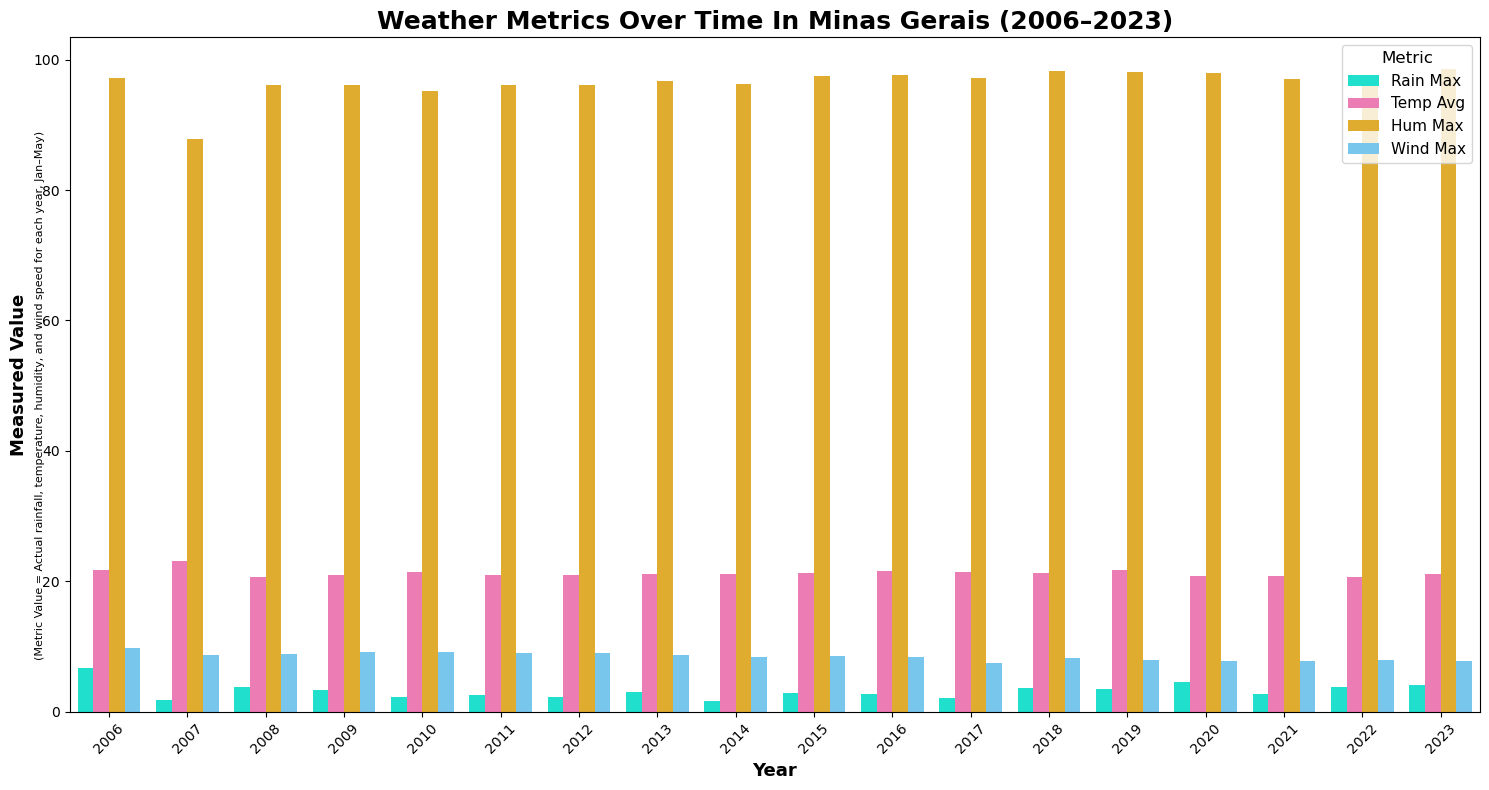

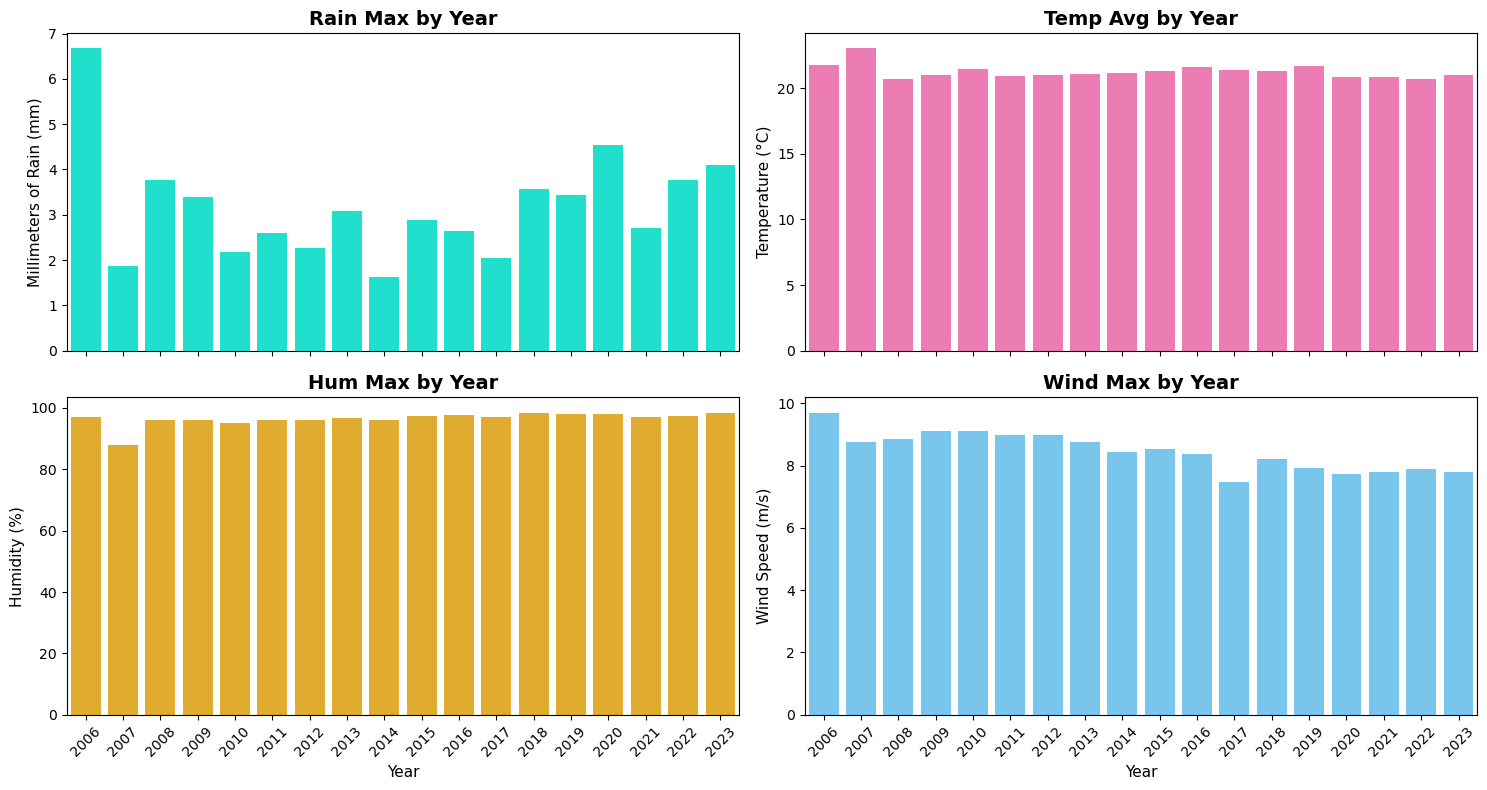

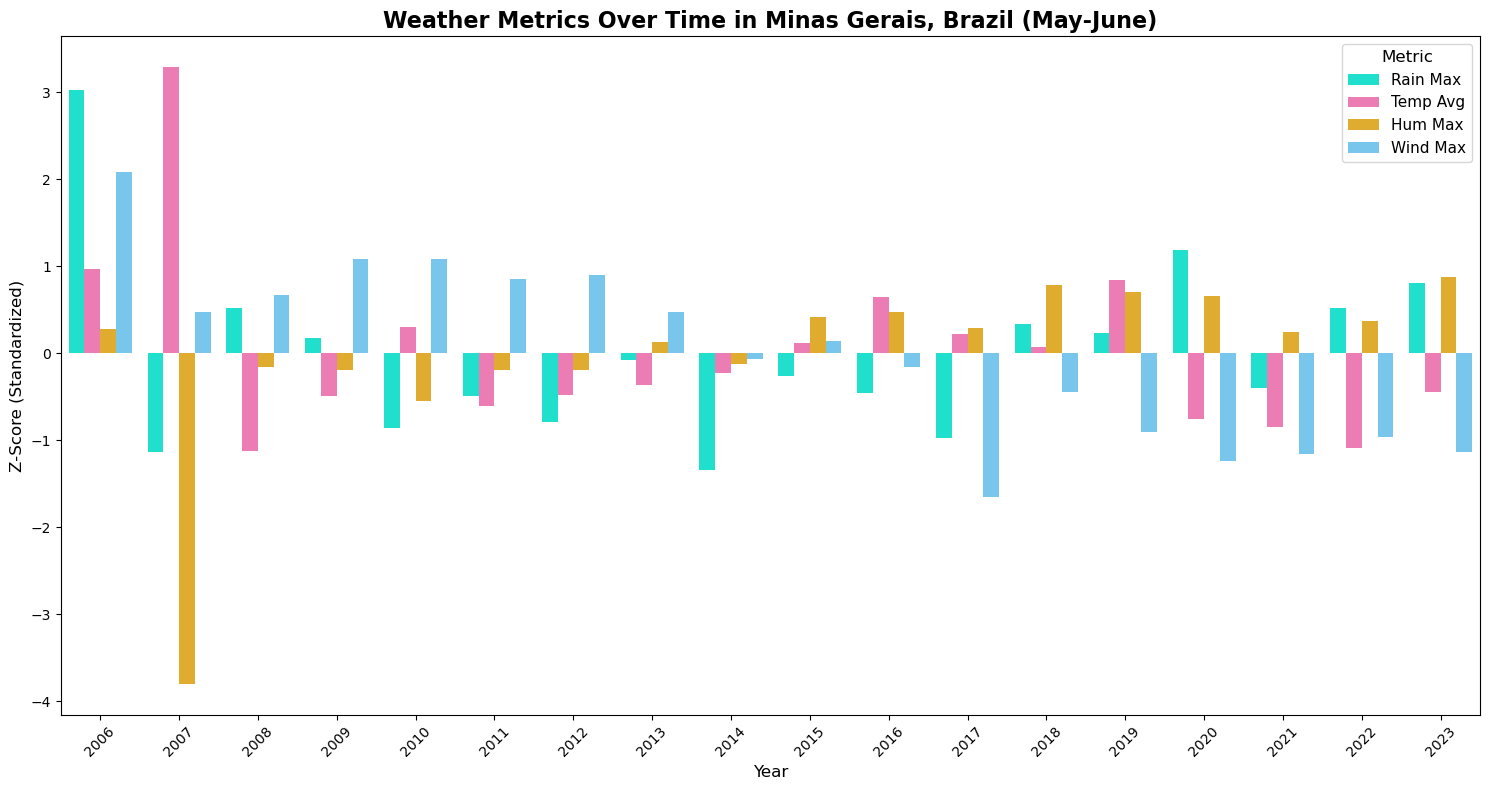

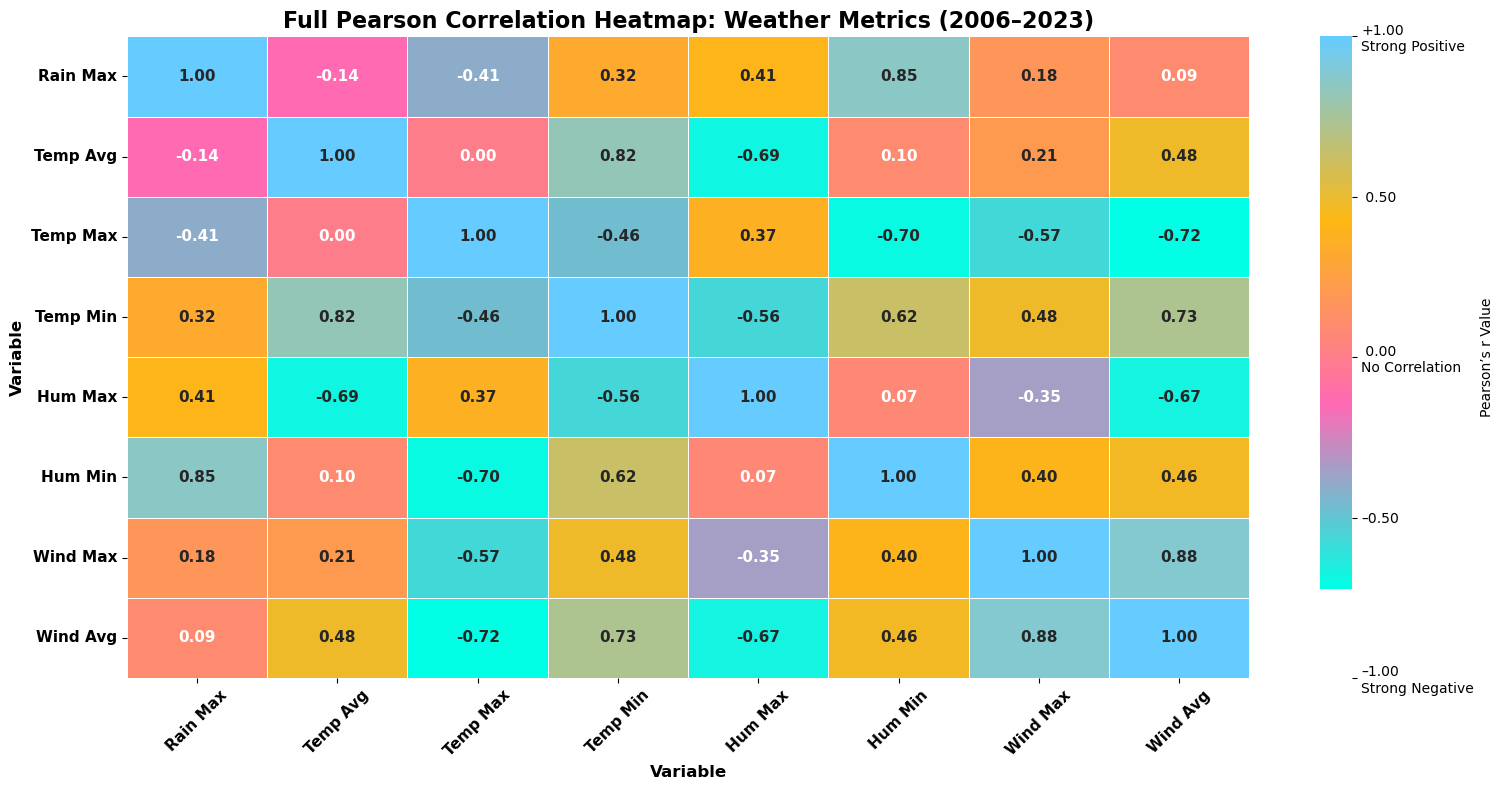

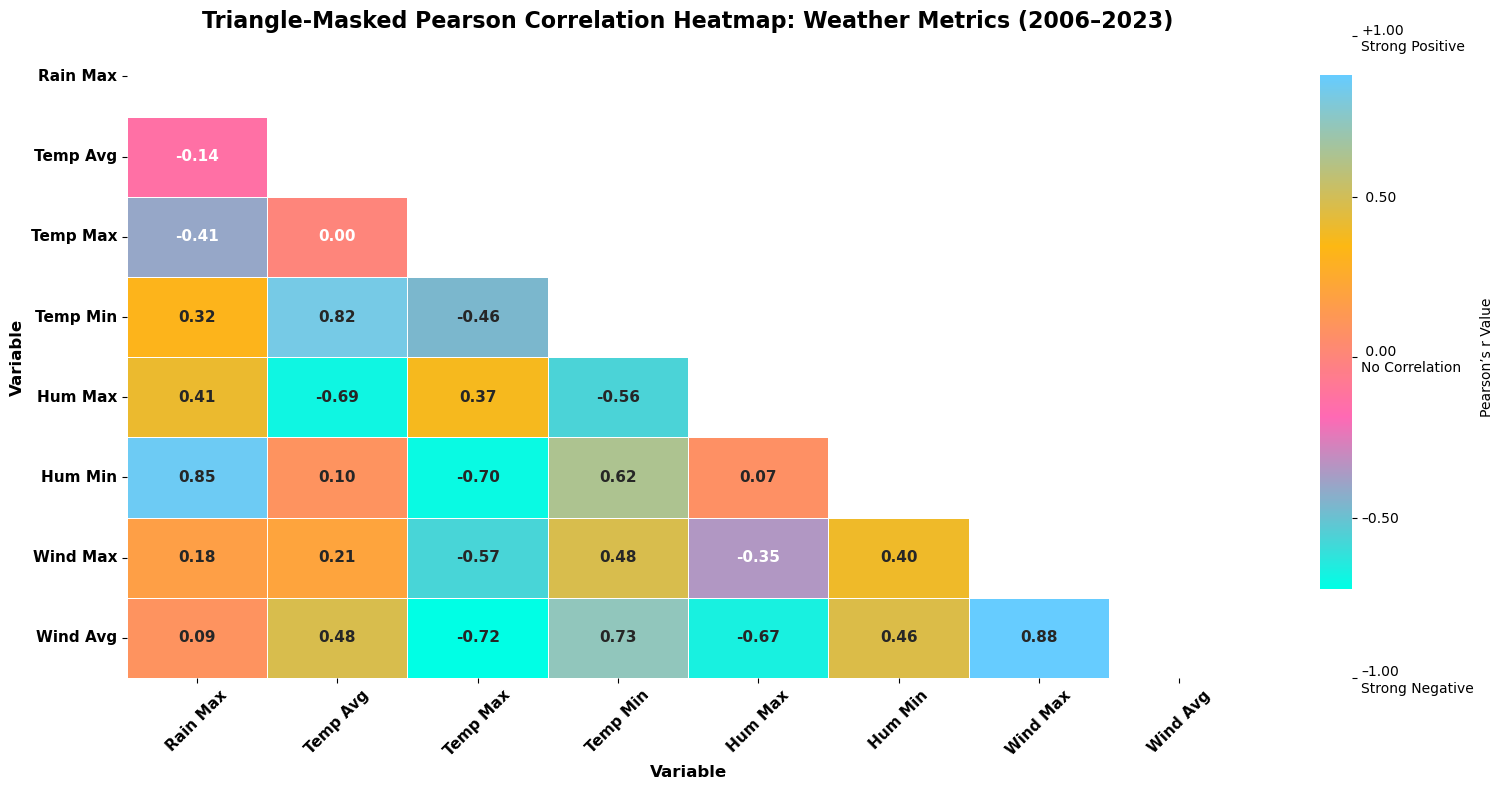

In [163]:
# TODO: Weather Metrics Over Time In Minas Gerais 

# Grouped Bar Chart
fig = plt.figure(figsize=(15, 8))
custom_palette = {
    "Rain Max": "#00FFE5",  
    "Temp Avg": "hotpink",  
    "Hum Max": "#FDB813",    
    "Wind Max": "#66CCFF"  
}
ax = sns.barplot(
    data=melted_weather,
    x="year",
    y="Value",
    hue="Metric",
    palette=custom_palette
)
plt.title("Weather Metrics Over Time In Minas Gerais (2006–2023)", fontsize=18, fontweight='bold')
plt.xlabel("Year", fontsize=13, fontweight='bold')
plt.ylabel("Measured Value", fontsize=13, fontweight='bold')
plt.subplots_adjust(left=0.25)
fig.text(
    0.03, 0.5,  # X is outside the plot area, left of label; Y is centered
    "(Metric Value = Actual rainfall, temperature, humidity, and wind speed for each year, Jan–May)",
    fontsize=8,
    ha='center',
    va='center',
    rotation='vertical'
)
plt.xticks(rotation=45)
plt.legend(title="Metric", fontsize=11, title_fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()


# separated bar charts : Weather Metrics Over Time In Minas Gerais
melted_weather = weather[["year", "rain_max", "temp_avg", "hum_max", "wind_max"]].melt(
    id_vars="year", var_name="Metric", value_name="Value"
)
melted_weather["Metric"] = melted_weather["Metric"].replace({
    "rain_max": "Rain Max",
    "temp_avg": "Temp Avg",
    "hum_max": "Hum Max",
    "wind_max": "Wind Max"
})
custom_palette = {
    "Rain Max": "#00FFE5",
    "Temp Avg": "hotpink",
    "Hum Max": "#FDB813",
    "Wind Max": "#66CCFF"
}
# Y-axis labels for each metric based on data dictionary
y_labels = {
    "Rain Max": "Millimeters of Rain (mm)",
    "Temp Avg": "Temperature (°C)",
    "Hum Max": "Humidity (%)",
    "Wind Max": "Wind Speed (m/s)"
}
# Create subplots
metrics = melted_weather["Metric"].unique()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8), sharex=True)
axes = axes.flatten()
for i, metric in enumerate(metrics):
    subset = melted_weather[melted_weather["Metric"] == metric]
    sns.barplot(data=subset, x="year", y="Value", color=custom_palette[metric], ax=axes[i])
    axes[i].set_title(f"{metric} by Year", fontsize=14, fontweight='bold')
    axes[i].set_xlabel("Year", fontsize=11)
    axes[i].set_ylabel(y_labels[metric], fontsize=11)  
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


# Z-score metrics to show when anomalies occurred 
from scipy.stats import zscore
weather_z = weather.copy()
weather_z[["rain_max", "temp_avg", "hum_max", "wind_max"]] = weather_z[["rain_max", "temp_avg", "hum_max", "wind_max"]].apply(zscore)
melted_z = weather_z[["year", "rain_max", "temp_avg", "hum_max", "wind_max"]].melt(
    id_vars="year", var_name="Metric", value_name="Z-Score"
)
melted_z["Metric"] = melted_z["Metric"].replace({
    "rain_max": "Rain Max",
    "temp_avg": "Temp Avg",
    "hum_max": "Hum Max",
    "wind_max": "Wind Max"
})
plt.figure(figsize=(15, 8))
sns.barplot(
    data=melted_z,
    x="year",
    y="Z-Score",
    hue="Metric",
    palette=custom_palette
)
plt.title("Weather Metrics Over Time in Minas Gerais, Brazil (May-June)", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Z-Score (Standardized)", fontsize=12)
plt.legend(title="Metric", fontsize=11, title_fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Full Correlation Matrix Heatmap: All Weather Variables - all pairwise relationships; spots both weak and strong correlations, identifies multicollinearity or clusters of similar behavior
weather_vars = [
    "rain_max", "temp_avg", "temp_max", "temp_min",
    "hum_max", "hum_min", "wind_max", "wind_avg"
]

corr = weather[weather_vars].corr()
labels = [col.replace("_", " ").title() for col in corr.columns]
mask = np.triu(np.ones_like(corr, dtype=bool))

from matplotlib.colors import LinearSegmentedColormap
neon_colors = ["#00FFE5", "hotpink", "#FDB813", "#66CCFF"]
chosen_cmap = LinearSegmentedColormap.from_list("custom_neon", neon_colors, N=256)

# HEATMAP 1: FULL CORRELATION
fig1, ax1 = plt.subplots(figsize=(15.5, 8))
hm1 = sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap=chosen_cmap,
    linewidths=0.5,
    linecolor='white',
    cbar_kws={"label": "Pearson’s r Value"},
    annot_kws={"size": 11, "weight": "bold"}
)
plt.title("Full Pearson Correlation Heatmap: Weather Metrics (2006–2023)", fontsize=16, fontweight='bold')
plt.xticks(ticks=np.arange(len(labels)) + 0.5, labels=labels, rotation=45, fontsize=11, fontweight='bold')
plt.yticks(ticks=np.arange(len(labels)) + 0.5, labels=labels, rotation=0, fontsize=11, fontweight='bold')
plt.xlabel("Variable", fontsize=12, fontweight='bold')
plt.ylabel("Variable", fontsize=12, fontweight='bold')

cb1 = hm1.collections[0].colorbar
cb1.set_ticks([-1, -0.5, 0, 0.5, 1])
cb1.set_ticklabels([
    "–1.00\nStrong Negative",
    "–0.50",
    " 0.00\nNo Correlation",
    " 0.50",
    "+1.00\nStrong Positive"
])
cb1.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.grid(False)
plt.show()

# Triangle-Masked Correlation Heatmap - clarifies relationships between weather variables, reduces redundancy for readability
fig2, ax2 = plt.subplots(figsize=(15.5, 8))
hm2 = sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap=chosen_cmap,
    linewidths=0.5,
    linecolor='white',
    cbar_kws={"label": "Pearson’s r Value"},
    annot_kws={"size": 11, "weight": "bold"}
)
plt.title("Triangle-Masked Pearson Correlation Heatmap: Weather Metrics (2006–2023)", fontsize=16, fontweight='bold')
plt.xticks(ticks=np.arange(len(labels)) + 0.5, labels=labels, rotation=45, fontsize=11, fontweight='bold')
plt.yticks(ticks=np.arange(len(labels)) + 0.5, labels=labels, rotation=0, fontsize=11, fontweight='bold')
plt.xlabel("Variable", fontsize=12, fontweight='bold')
plt.ylabel("Variable", fontsize=12, fontweight='bold')

cb2 = hm2.collections[0].colorbar
cb2.set_ticks([-1, -0.5, 0, 0.5, 1])
cb2.set_ticklabels([
    "–1.00\nStrong Negative",
    "–0.50",
    " 0.00\nNo Correlation",
    " 0.50",
    "+1.00\nStrong Positive"
])
cb2.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.grid(False)
plt.show()

## 🧠Univariate Analysis 
🌡️ How is average temperature, minimum humidity, and average wind speed changing across the years for Minas Gerais? Is this increasing or decreasing?
Which year had the highest maximum record rainfall?

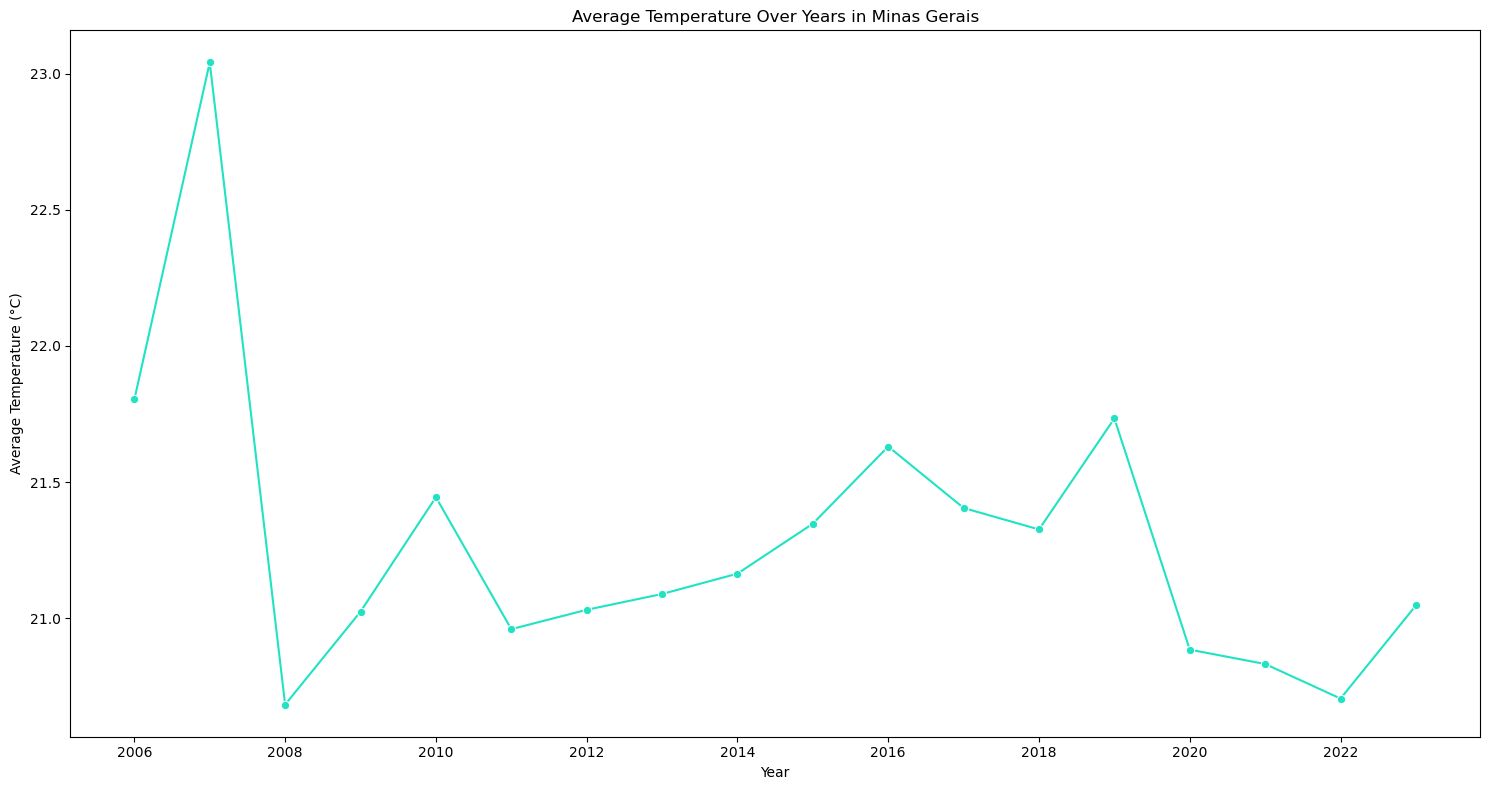

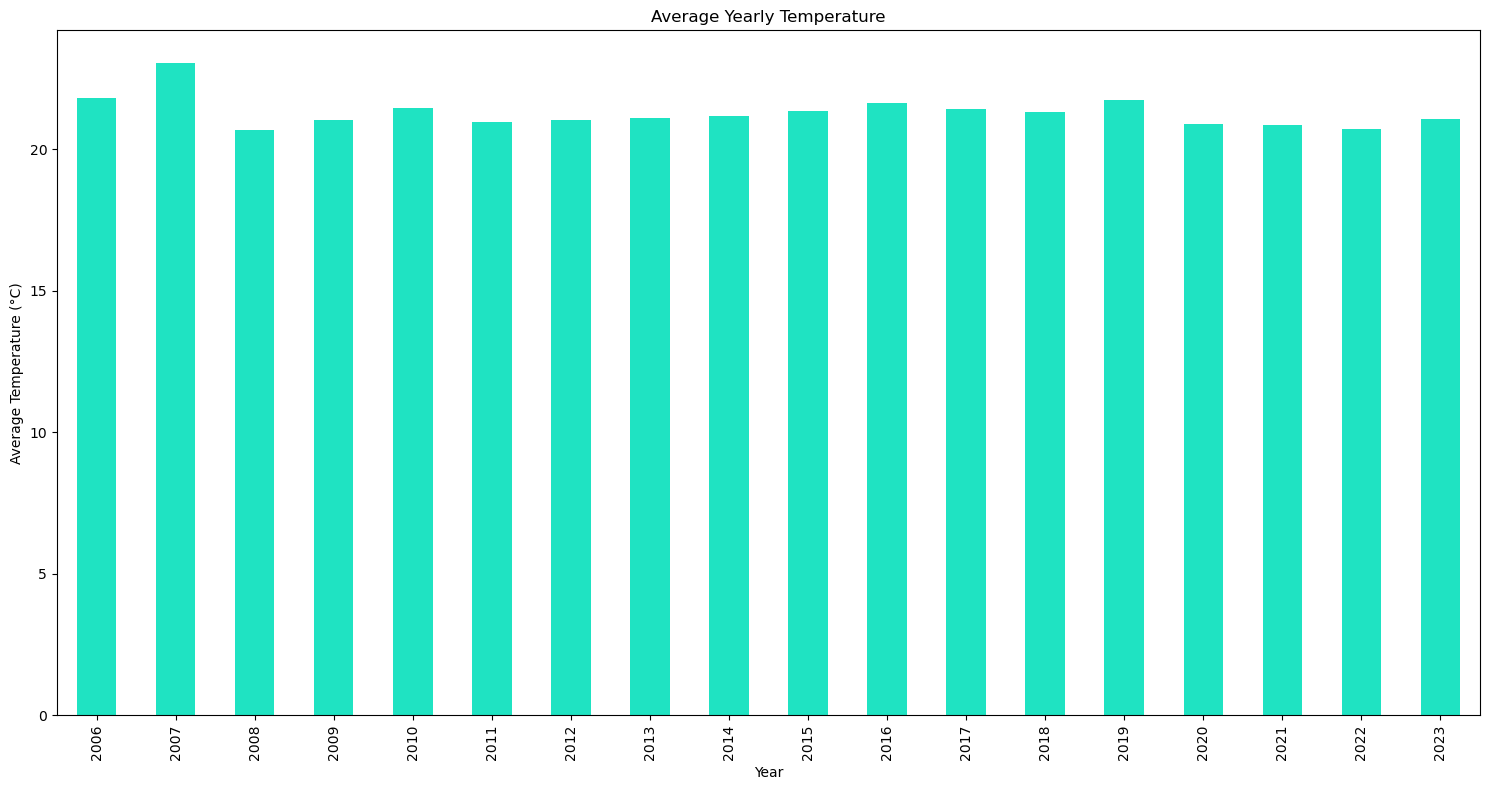

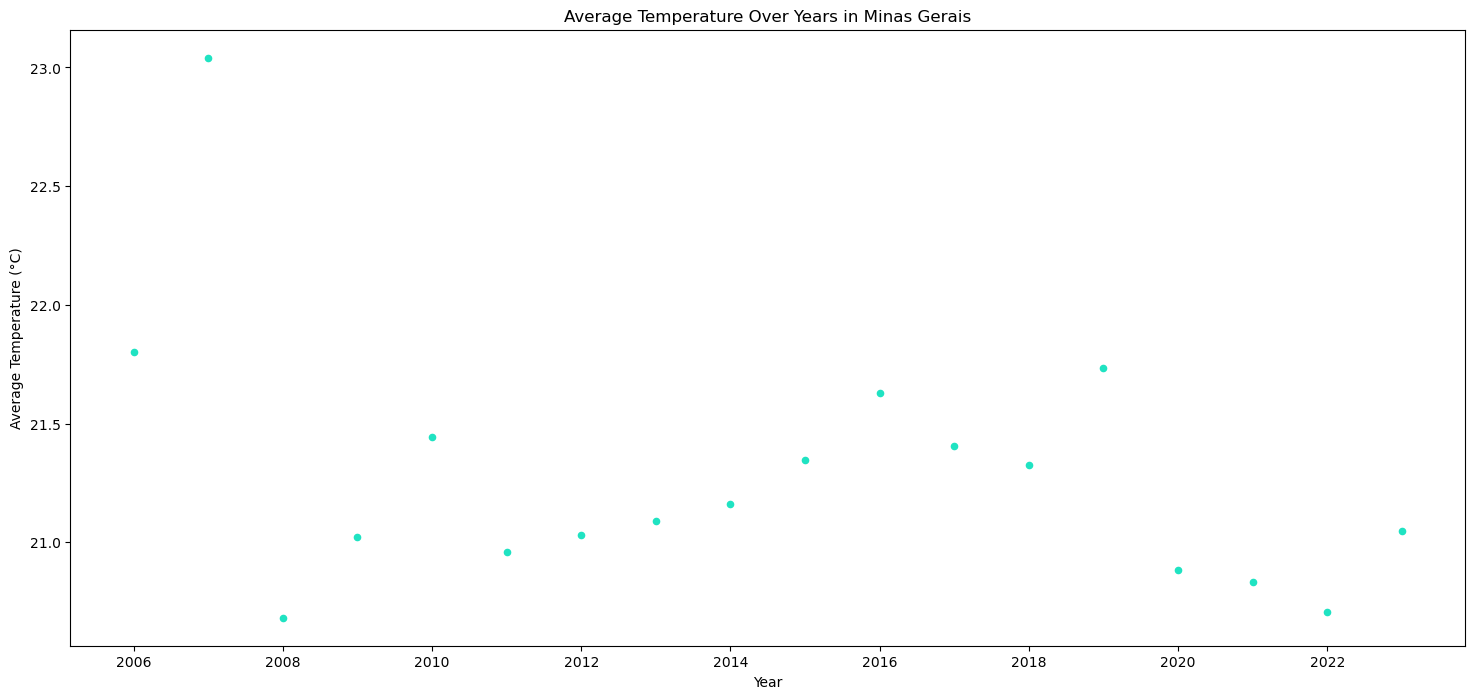

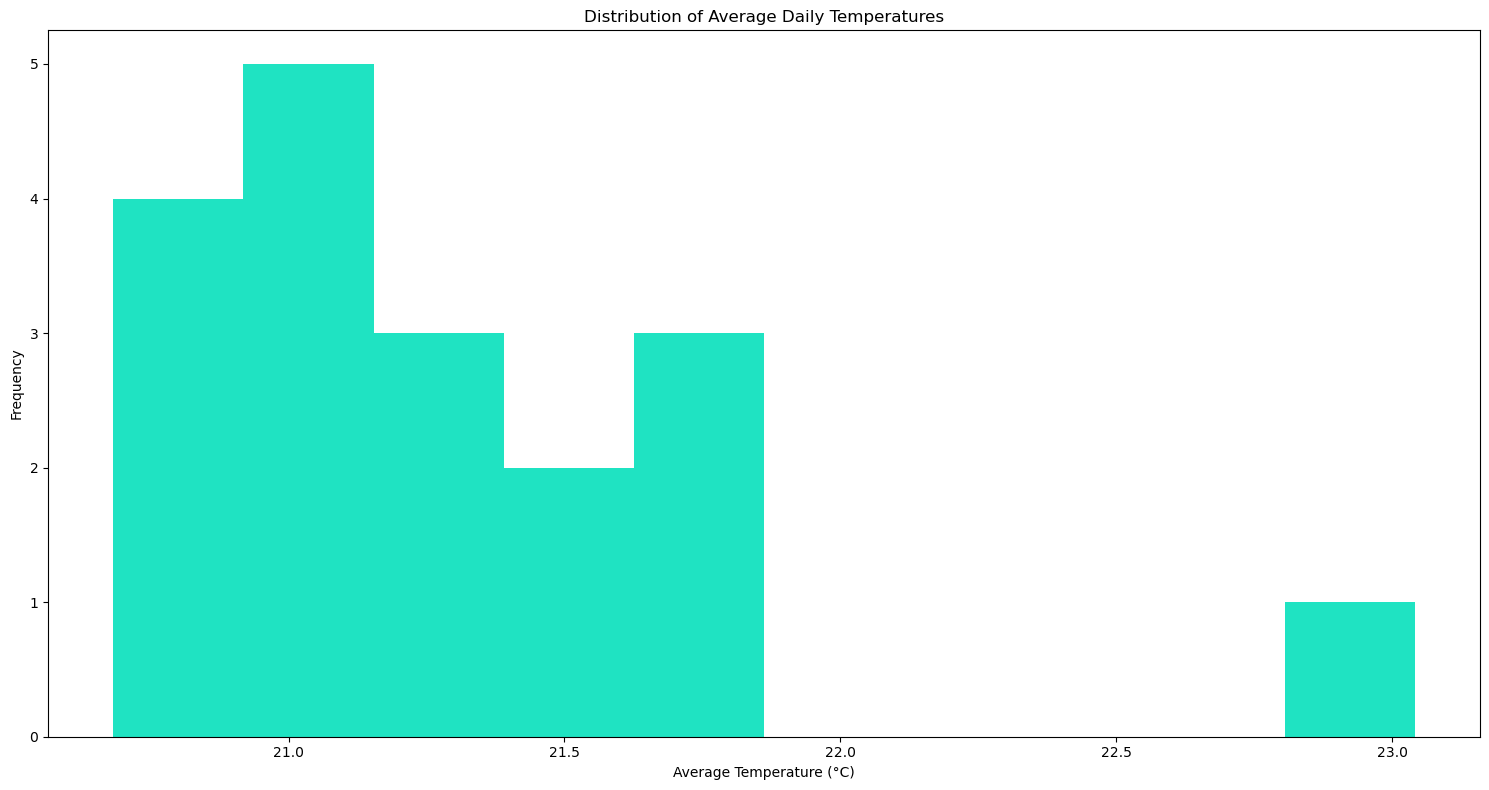

In [164]:
# TODO: BEGIN YOUR EDA! 

# average temperature Line Chart
plt.figure(figsize=(15,8))
sns.lineplot(data=weather, x="year", y="temp_avg", marker='o', color="#1FE3C2")
plt.title("Average Temperature Over Years in Minas Gerais")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.gca().xaxis.set_major_locator(xlocator.MultipleLocator(2))
plt.tight_layout()
plt.show()

#average temperature Bar Chart
weather.groupby("year")["temp_avg"].mean().plot(kind="bar", figsize=(15,8), color="#1FE3C2")

plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.title("Average Yearly Temperature")  
plt.tight_layout()

# average temperature Scatter Plot
weather.plot.scatter(x="year", y="temp_avg", color="#1FE3C2", figsize=(18, 8))
plt.title("Average Temperature Over Years in Minas Gerais")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.gca().xaxis.set_major_locator(xlocator.MultipleLocator(2))
plt.show()

# average temperature Histogram shows distribution of average daily temperatures with gaps in our data set.
weather["temp_avg"].plot.hist(figsize=(15,8), color="#1FE3C2")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Distribution of Average Daily Temperatures")
plt.tight_layout()

# average temperature Box Plot
# average temperature Violin Plot

## 💧 **Minimum Humidity in Minas Gerais (2006–2023)**

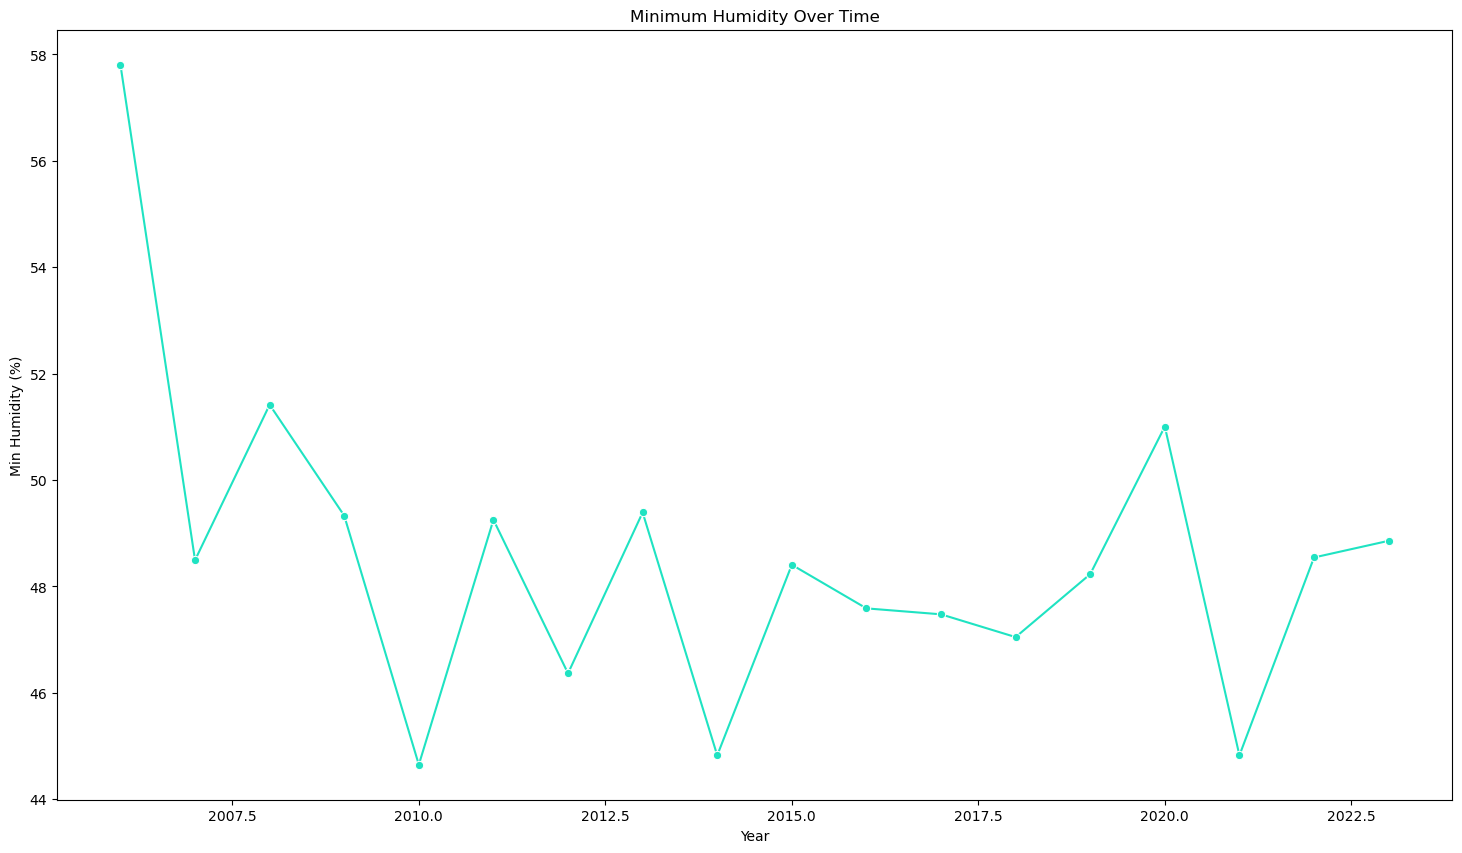

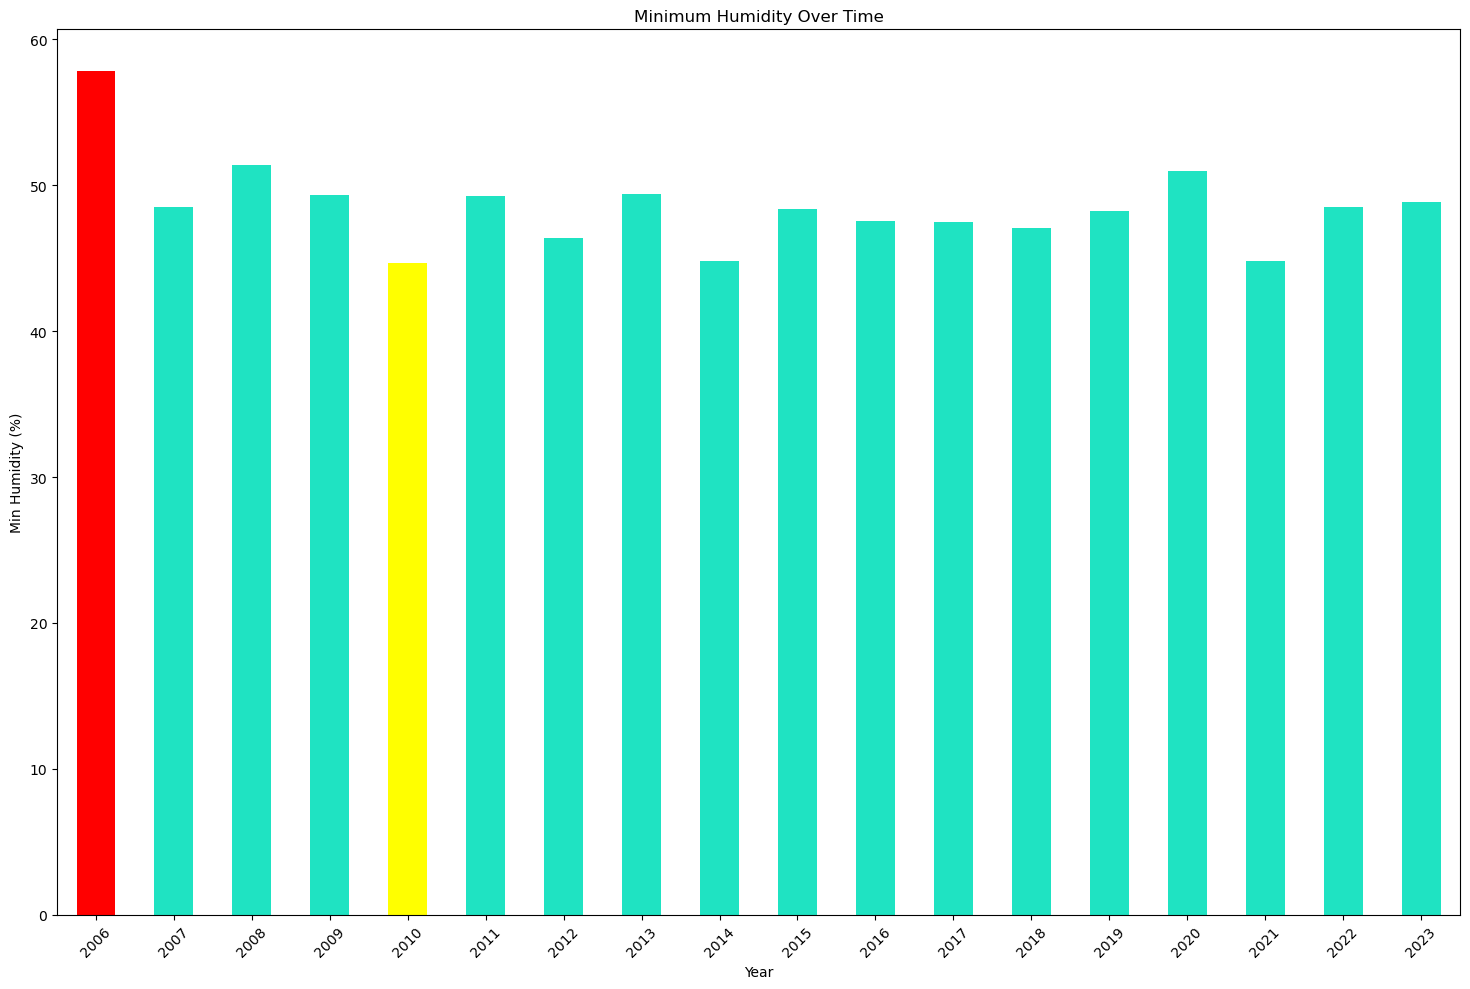

In [165]:
# TODO: minimum humidity Line Plot 
plt.figure(figsize=(18, 10))
sns.lineplot(data=weather, x="year", y="hum_min", marker='o', color="#1FE3C2")
plt.title("Minimum Humidity Over Time")
plt.xlabel("Year")
plt.ylabel("Min Humidity (%)")
plt.show()

#minimum humidity Bar Chart 
hum = weather.groupby("year")["hum_min"].mean()
colors = ['#1FE3C2'] * len(hum)

# significance highlight
colors[hum.index.get_loc(hum.idxmin())] = 'yellow'
colors[hum.index.get_loc(hum.idxmax())] = 'red'

hum.plot(kind="bar", color=colors, figsize=(14.8, 10))
plt.title("Minimum Humidity Over Time")
plt.xlabel("Year")
plt.ylabel("Min Humidity (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 🌬️ **Average wind speed changing across the years, in Minas Gerais, (2006–2023)**

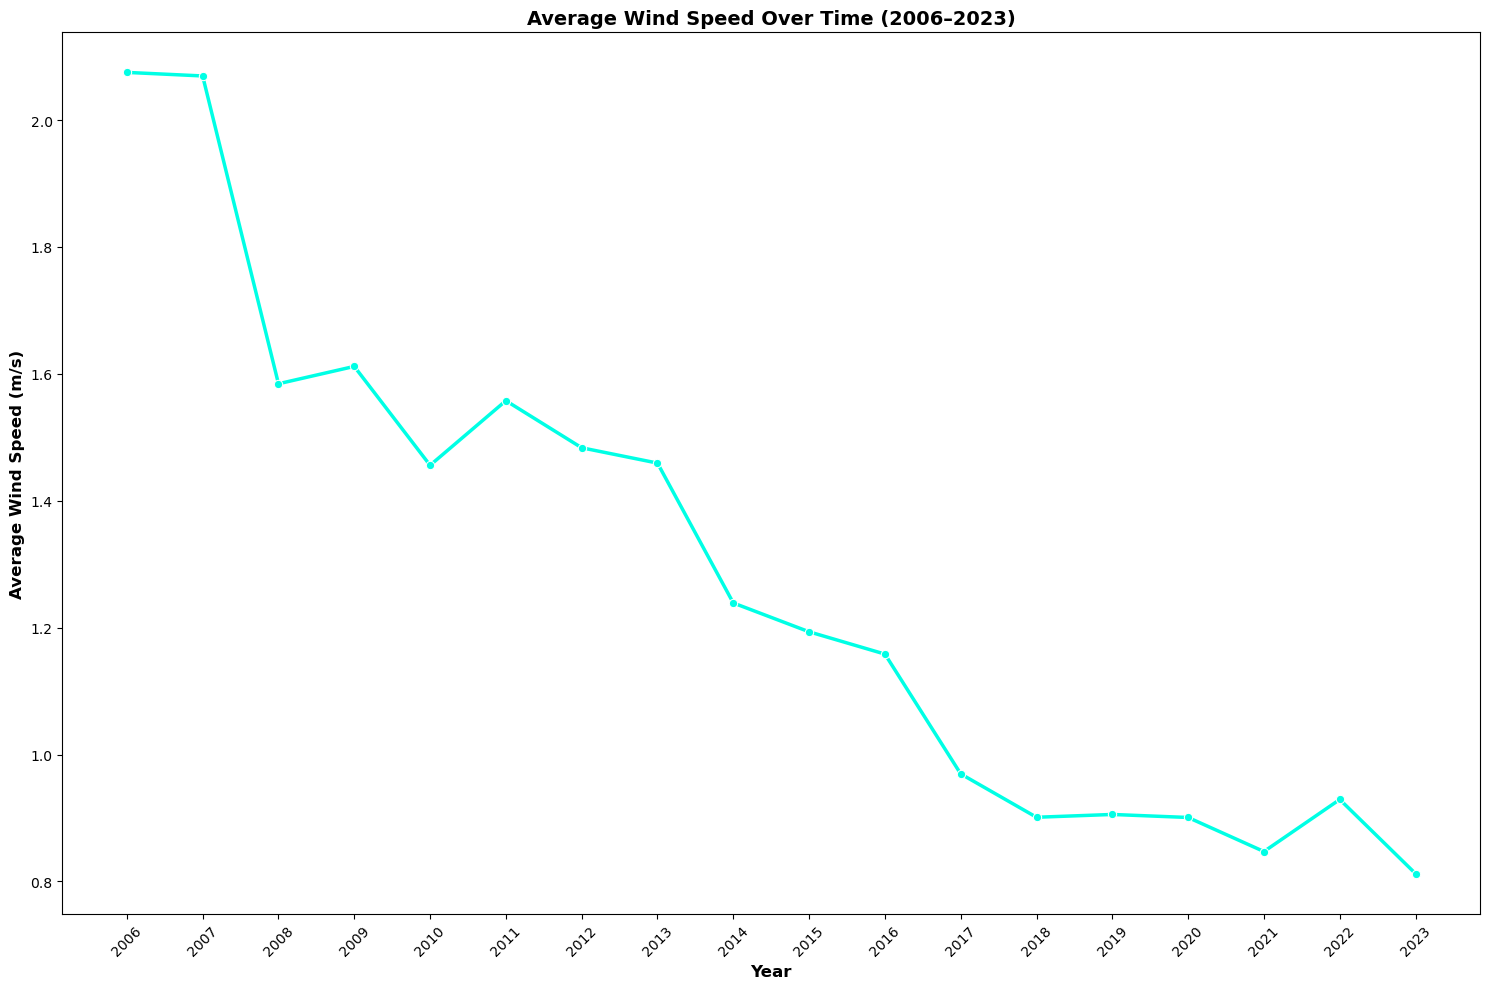

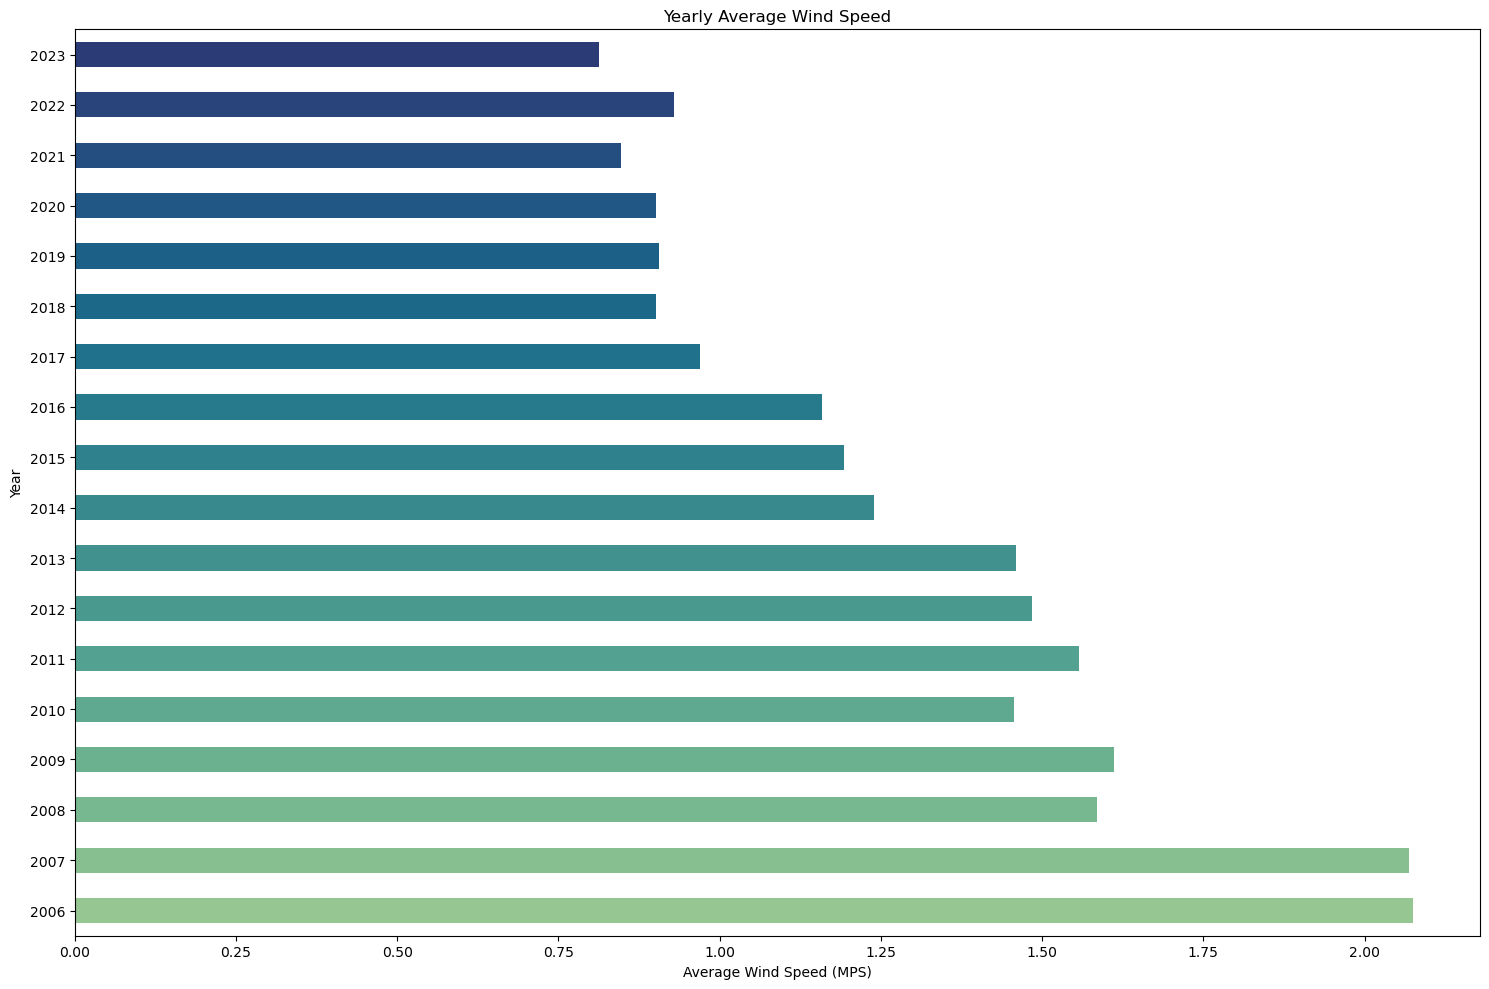

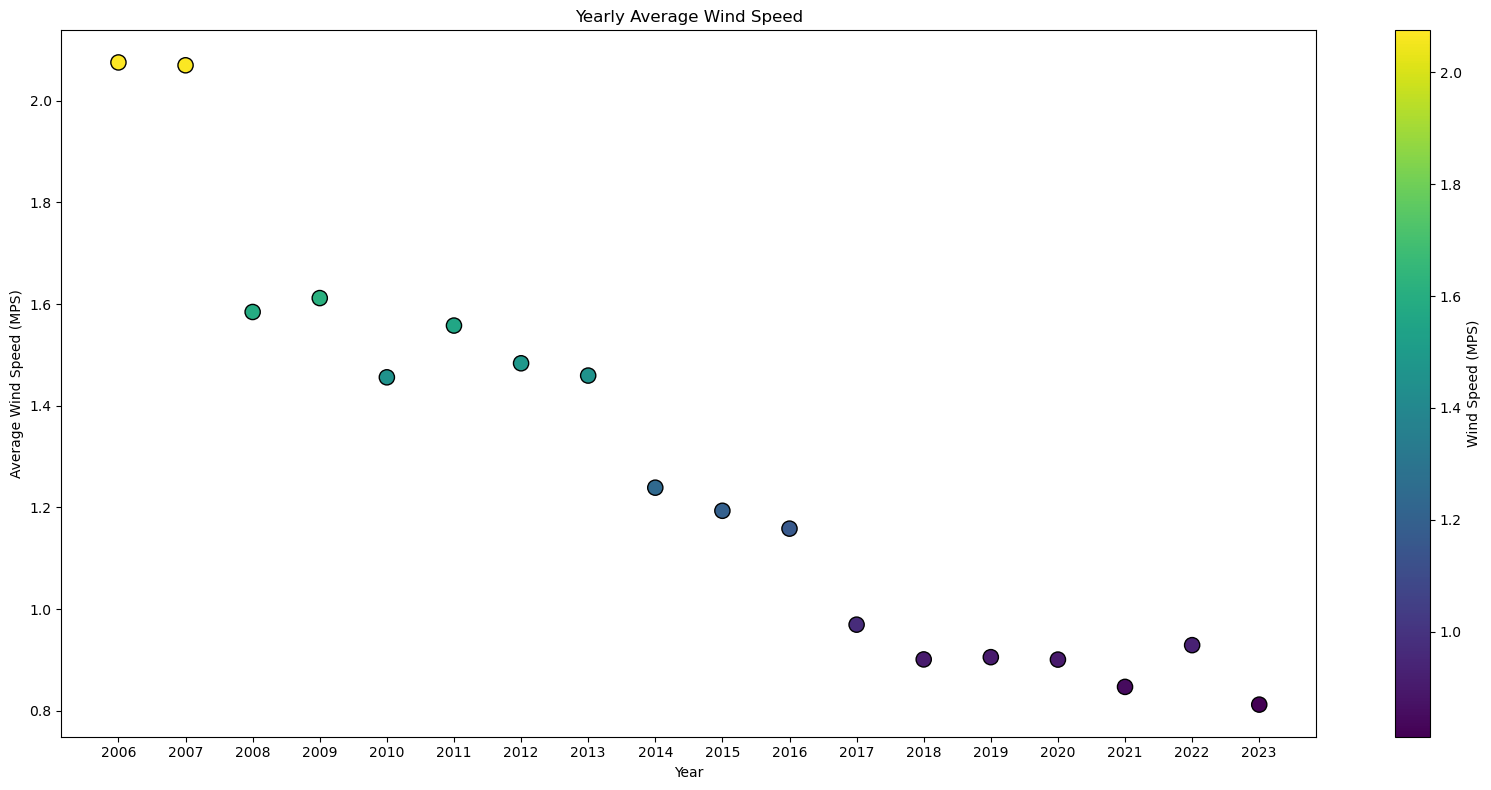

In [166]:
# TODO: average wind speed  

# Line Plot for Average Wind Speed Over Time
plt.figure(figsize=(15, 10))
sns.lineplot(
    x="year", 
    y="wind_avg", 
    data=weather, 
    marker="o", 
    linewidth=2.5, 
    color="#00FFE5"  # neon teal
)
plt.title("Average Wind Speed Over Time (2006–2023)", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12, fontweight='bold')
plt.ylabel("Average Wind Speed (m/s)", fontsize=12, fontweight='bold')
plt.xticks(ticks=weather["year"], rotation=45)  # Show actual year values
plt.grid(False)
plt.tight_layout()
plt.show()


# Horizontal Bar Chart
colors = sns.color_palette("crest", len(weather["year"].unique()))
weather.groupby("year")["wind_avg"].mean().plot(
    kind="barh", 
    figsize=(15, 10), 
    color=colors
)
plt.xlabel("Average Wind Speed (MPS)")
plt.ylabel("Year")
plt.title("Yearly Average Wind Speed") 
plt.tight_layout()
plt.show()

# Color-Mapped Scatter Plot
plt.figure(figsize=(16.5, 8))
plt.scatter(
    weather["year"], 
    weather["wind_avg"], 
    c=weather["wind_avg"], 
    cmap="viridis", 
    s=120, 
    edgecolor="black"
)
plt.xlabel("Year")
plt.ylabel("Average Wind Speed (MPS)")
plt.title("Yearly Average Wind Speed")
plt.colorbar(label="Wind Speed (MPS)")
plt.xticks(weather["year"].unique()) 
plt.tight_layout()
plt.show()


In [167]:
r = weather.index.astype(int).to_series().corr(weather["wind_avg"])  # Pearson correlation coefficient
print(f"Pearson's r: {r:.2f}")  # Output indicates trend direction and strength

Pearson's r: -0.95


In [168]:
weather["year"].corr(weather["wind_avg"]) #Pearson's correlation coefficinet is very high negatve correlation

np.float64(-0.9516285243842627)

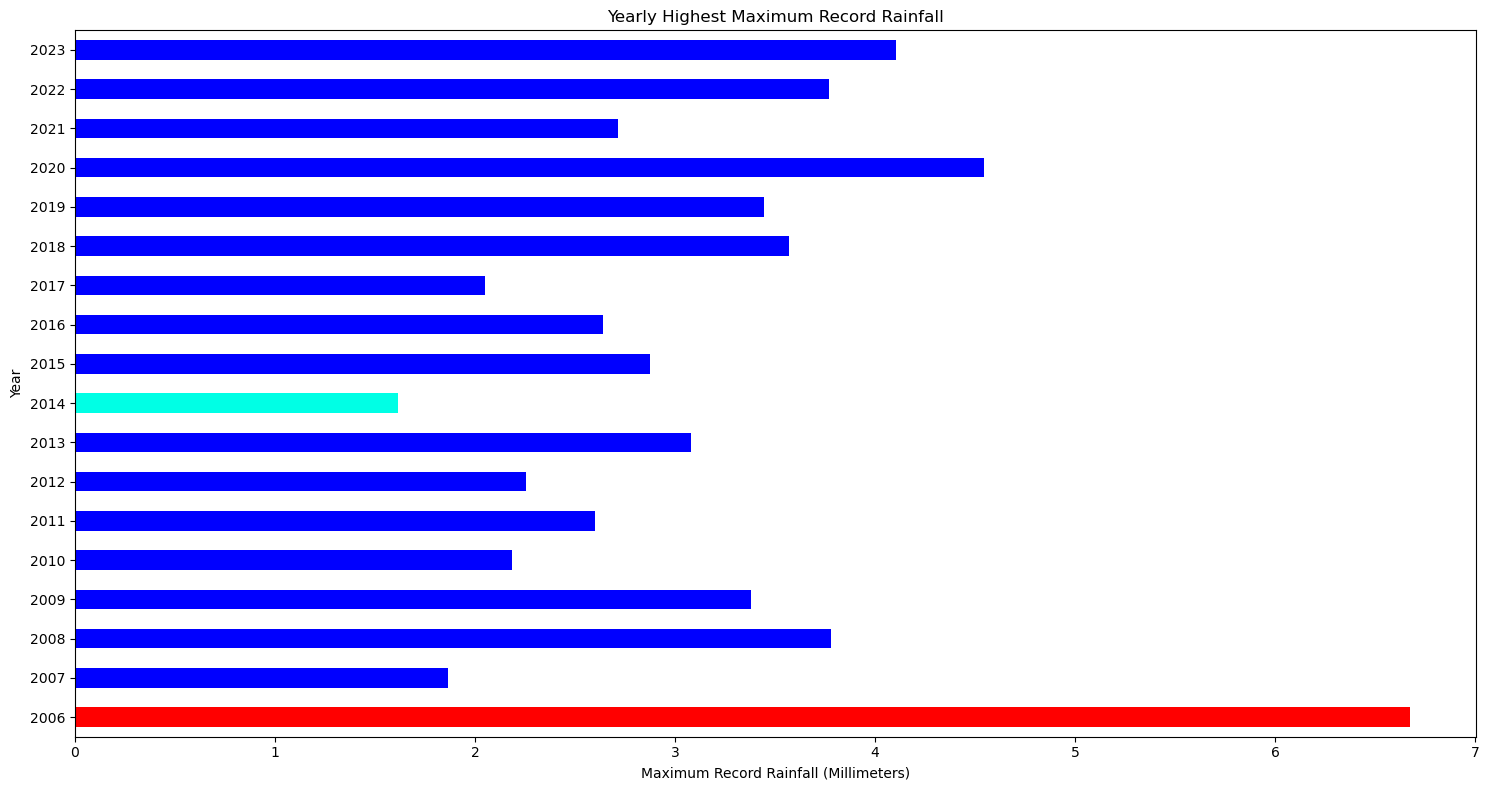

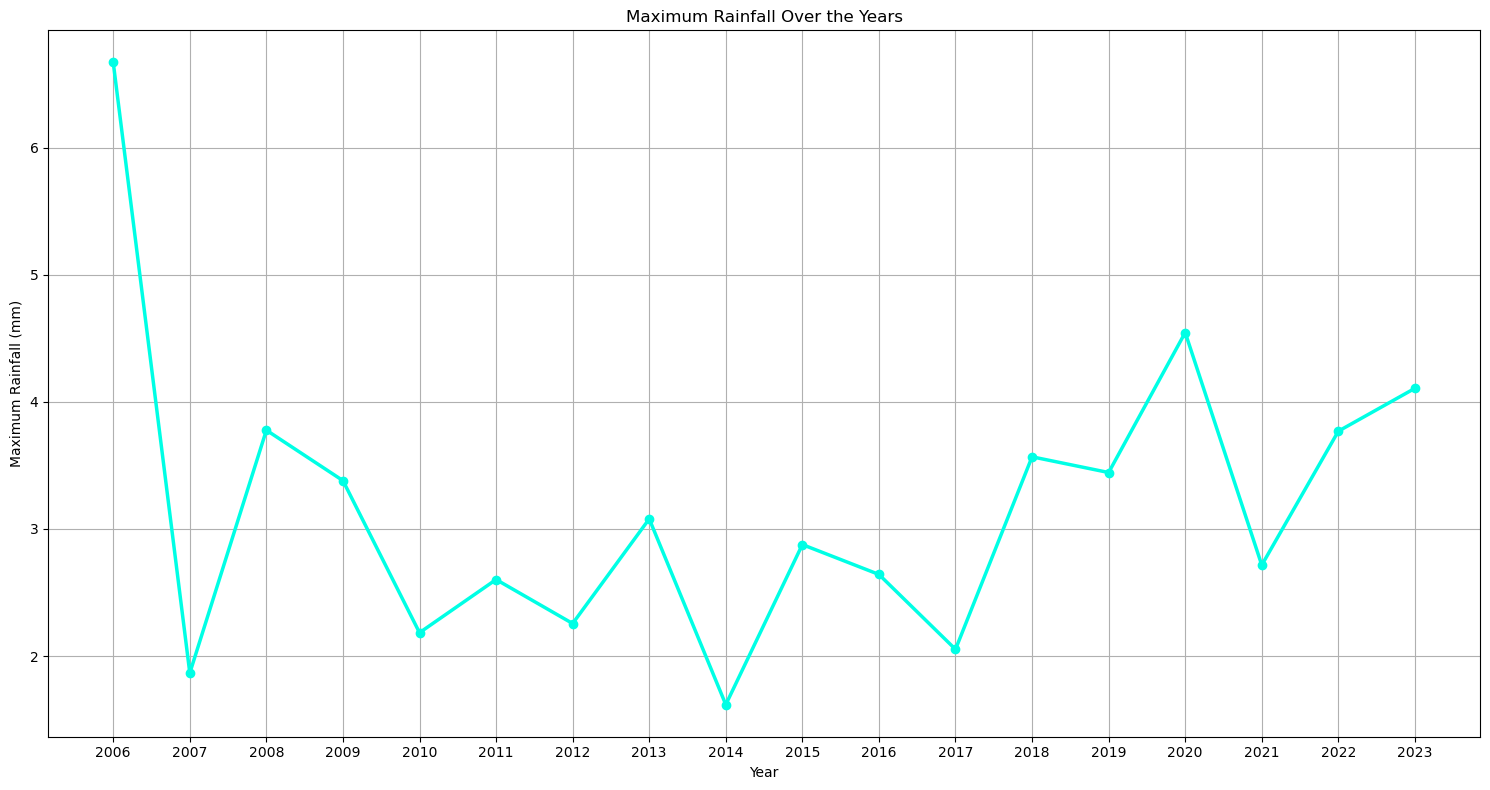

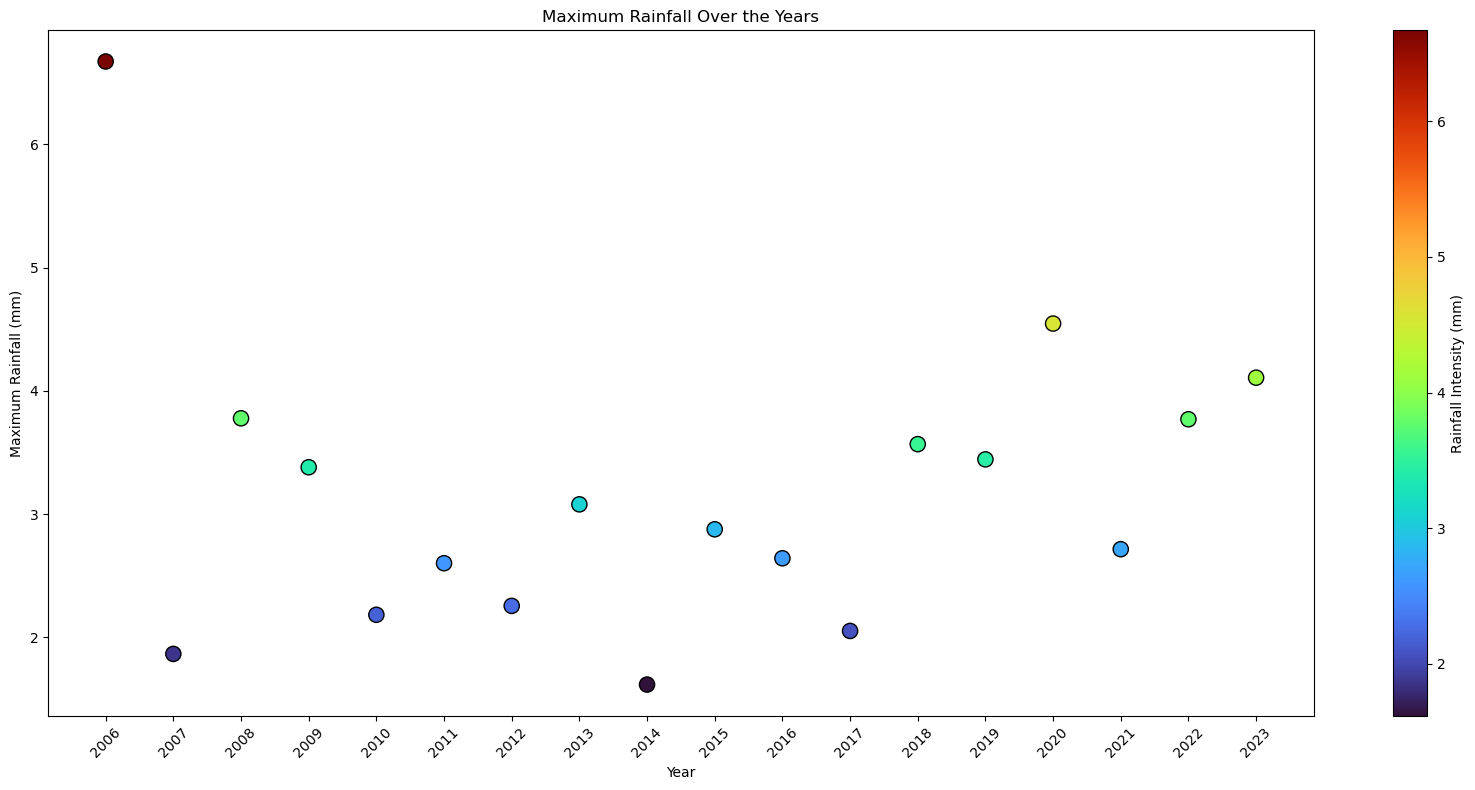

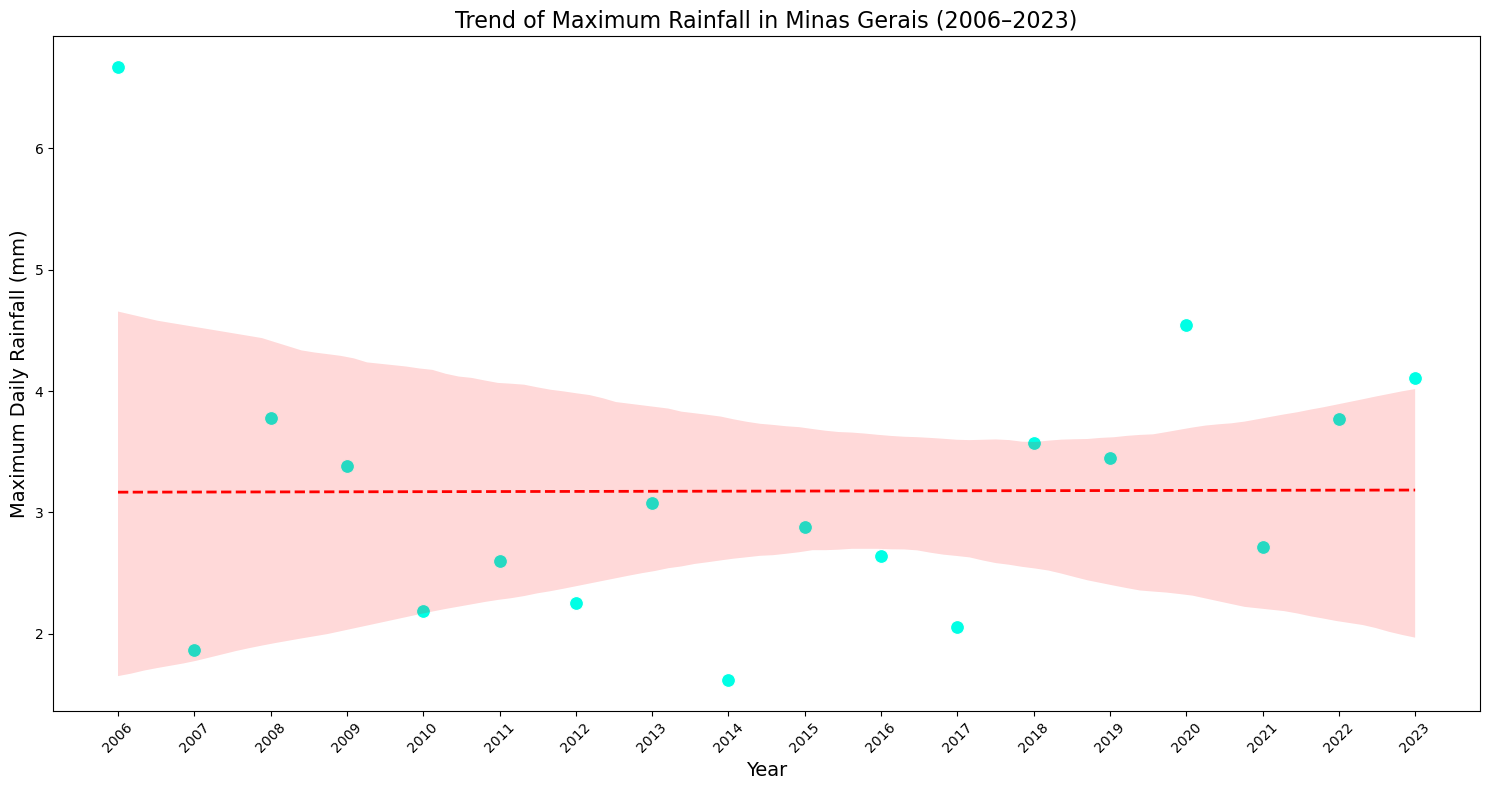

In [169]:
# TODO: year with highest maximum record rainfall

# bar chart
rain = weather.groupby("year")["rain_max"].max()
max_val = rain.max()
min_val = rain.min()


rain.plot(
    kind="barh",
    figsize=(15, 8),
    color=[
        'red' if r == max_val else
        '#00FFE5' if r == min_val else
        'blue'  
        for r in rain
    ]
)
plt.xlabel("Maximum Record Rainfall (Millimeters)")
plt.ylabel("Year")
plt.title("Yearly Highest Maximum Record Rainfall")
plt.tight_layout()
plt.show()

# Line Graph 
rain = weather.groupby("year")["rain_max"].max()

plt.figure(figsize=(15, 8))
plt.plot(rain.index.astype(int), rain.values, marker='o', color='#00FFE5', linewidth=2.5)  
plt.title("Maximum Rainfall Over the Years")
plt.xlabel("Year")
plt.ylabel("Maximum Rainfall (mm)")
plt.xticks(rain.index.astype(int))  
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter Plot - Inttensity Indicator
plt.figure(figsize=(16.5, 8))
plt.scatter(
    weather["year"],
    weather["rain_max"],
    c=weather["rain_max"],
    cmap="turbo",   
    s=120,
    edgecolor="black"
)
plt.xticks(ticks=weather["year"].astype(int), rotation=45)
plt.title("Maximum Rainfall Over the Years")
plt.xlabel("Year")
plt.ylabel("Maximum Rainfall (mm)")
plt.colorbar(label="Rainfall Intensity (mm)")
plt.tight_layout()
plt.show()

# scatter plot with trend line
plt.figure(figsize=(15, 8))
sns.scatterplot(data=weather, x="year", y="rain_max", s=100, color="#00FFE5")  # neon teal points
sns.regplot(
    data=weather,
    x="year",
    y="rain_max",
    scatter=False,
    color="red",
    line_kws={"linewidth": 2, "linestyle": "--"}
)
plt.title("Trend of Maximum Rainfall in Minas Gerais (2006–2023)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Maximum Daily Rainfall (mm)", fontsize=14)
plt.xticks(ticks=weather["year"].astype(int), rotation=45)
plt.grid(False)  # Disable grid lines
plt.tight_layout()
plt.show()

In [170]:
# Year with highest max rainfall
max_rain_year = weather.loc[weather["rain_max"].idxmax(), "year"]
max_rain_value = weather["rain_max"].max()
print(f"Year with highest max rainfall: {max_rain_year} ({max_rain_value:.2f} mm)")


Year with highest max rainfall: 2006 (6.67 mm)


In [171]:
weather.groupby("year").rain_max.describe() #data frame confirms 2006 is the year with Maxium amount of rain.

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2006,1.0,6.670968,NaN,6.670968,6.670968,6.670968,6.670968,6.670968
2007,1.0,1.866250,NaN,1.866250,1.866250,1.866250,1.866250,1.866250
2008,1.0,3.777049,NaN,3.777049,3.777049,3.777049,3.777049,3.777049
2009,1.0,3.380220,NaN,3.380220,3.380220,3.380220,3.380220,3.380220
2010,1.0,2.183516,NaN,2.183516,2.183516,2.183516,2.183516,2.183516
2011,1.0,2.601786,NaN,2.601786,2.601786,2.601786,2.601786,2.601786
2012,1.0,2.255738,NaN,2.255738,2.255738,2.255738,2.255738,2.255738
2013,1.0,3.079121,NaN,3.079121,3.079121,3.079121,3.079121,3.079121
2014,1.0,1.617582,NaN,1.617582,1.617582,1.617582,1.617582,1.617582


In [172]:
r = weather["year"].corr(weather["rain_max"]) # Pearson correlation coefficient
print(f"Pearson's r: {r:.2f}") # Output shows r ≈ 0.00 → no linear correlation between year and max rainfall


Pearson's r: 0.00


In [173]:
weather["year"].corr(weather["rain_max"]) #Pearson's correlation coefficinet is very low 

np.float64(0.0046307990823462675)

## 4. 🧠Bivariate Analysis 

## 🌧️ Maximum rain and Maximum humidity
What is the relationship between max rain and max humidity? How strong is this relationship? Use pearson's correlation coefficient.

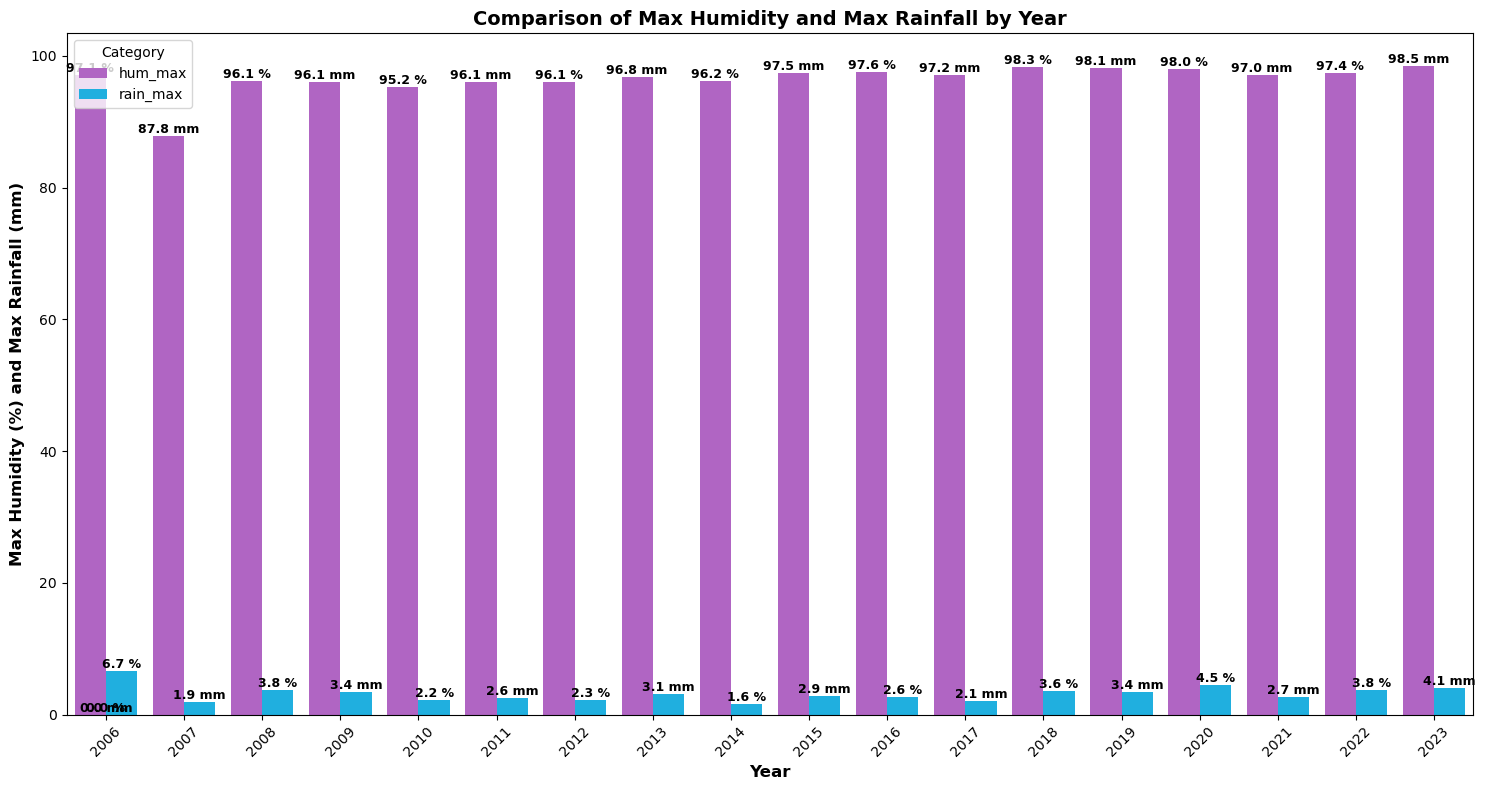

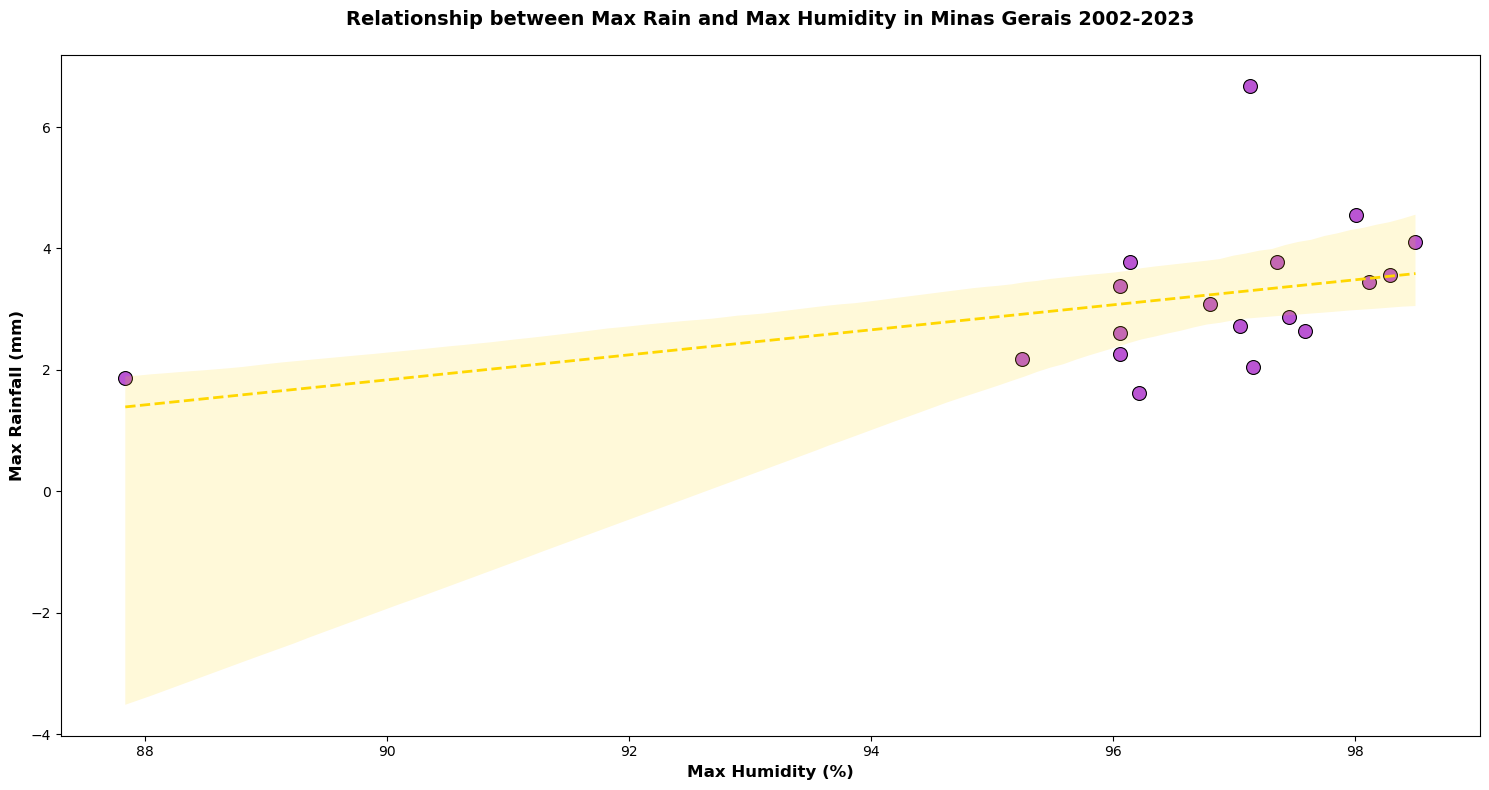

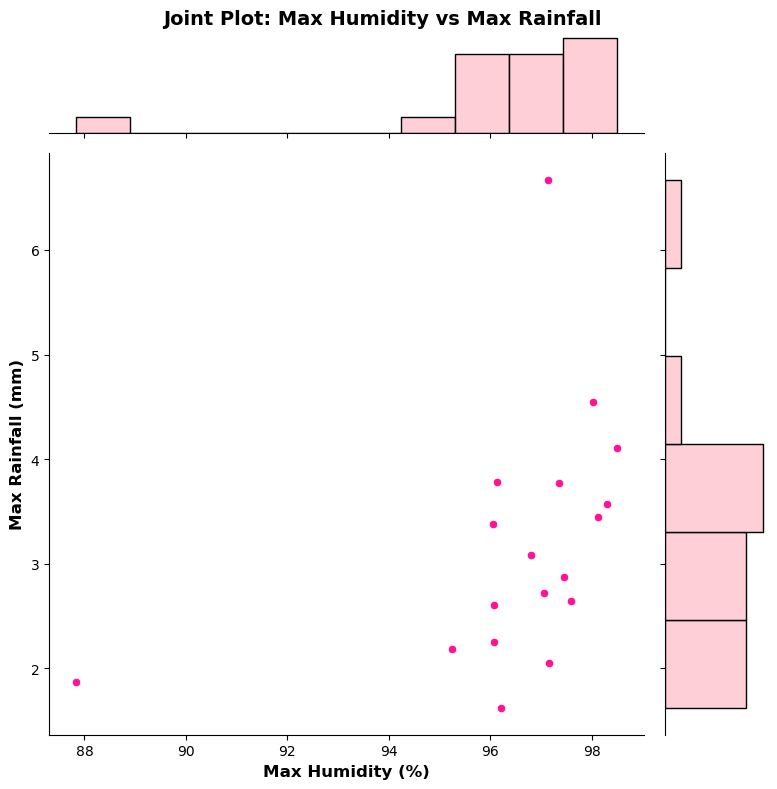

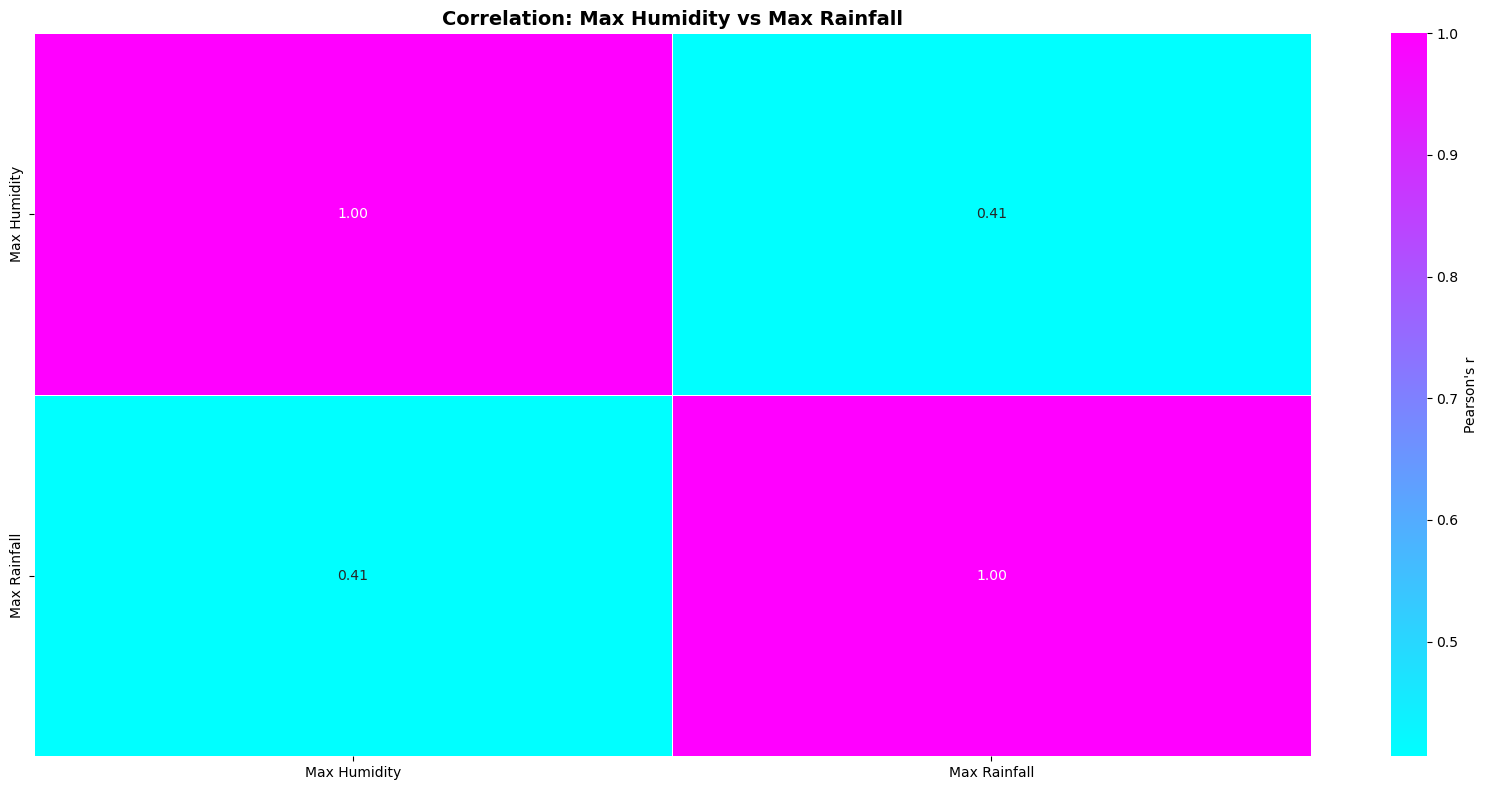

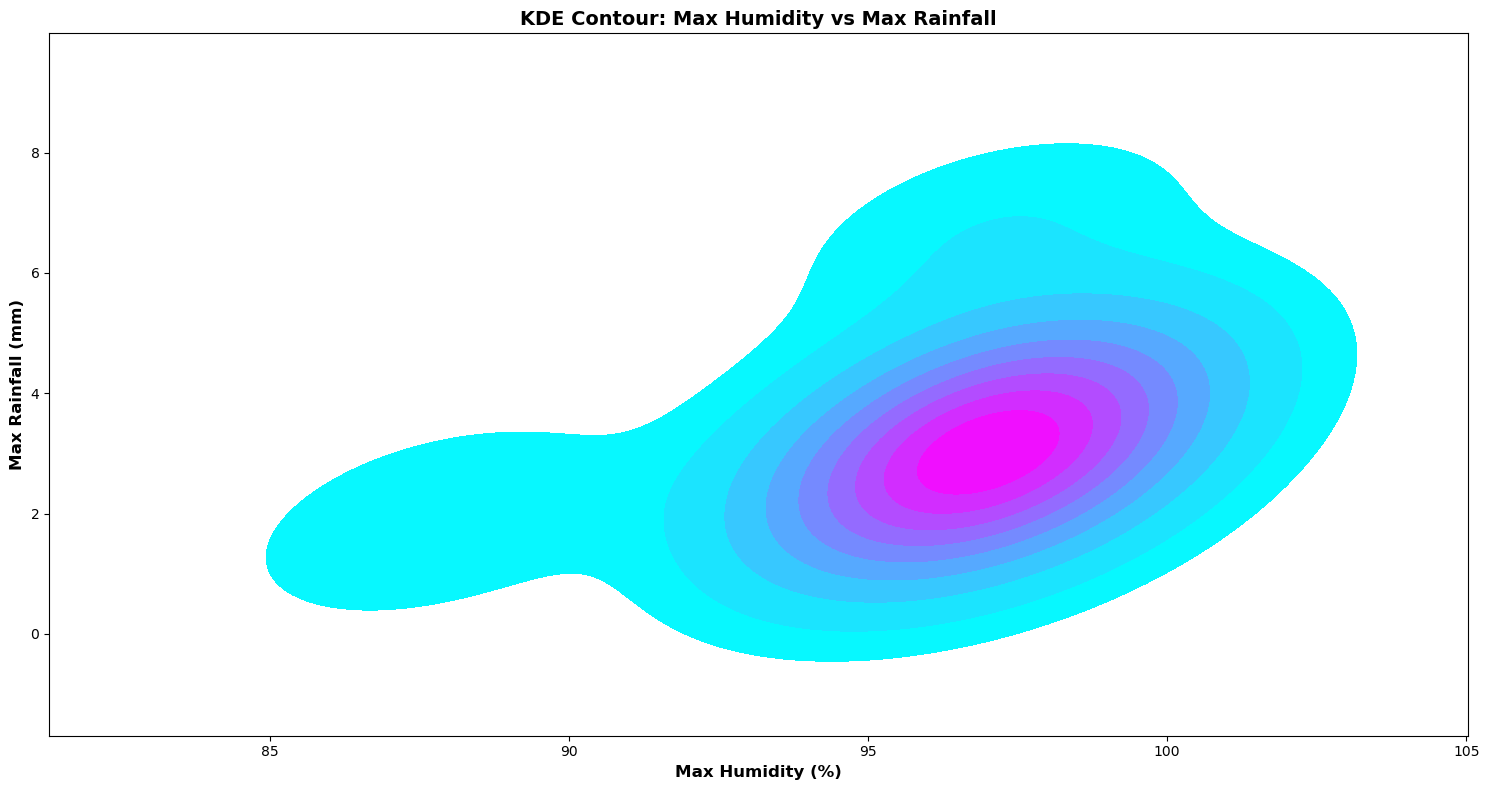

In [183]:
# TODO: relationship between max rain and max humidity

# max rain and max humidity grouped bar chart
bar_df = weather[["year", "hum_max", "rain_max"]].copy()
bar_df = bar_df.melt(id_vars="year", var_name="Category", value_name="Value")
palette = {"hum_max": "mediumorchid", "rain_max": "deepskyblue"}
units = {"hum_max": "%", "rain_max": "mm"}
plt.figure(figsize=(15, 8))
barplot = sns.barplot(
    data=bar_df,
    x="year",
    y="Value",
    hue="Category",
    palette=palette
)
for i, bar in enumerate(barplot.patches):
    height = bar.get_height()
    # Extract the category from the hue assignment order
    category_index = i % 2  # Alternates: 0 = hum_max, 1 = rain_max
    category = list(palette.keys())[category_index]
    unit = units[category]
    label = f"{height:.1f} {unit}"
    barplot.annotate(
        label,
        (bar.get_x() + bar.get_width() / 2, height),
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold',
        color='black'
    )
plt.title("Comparison of Max Humidity and Max Rainfall by Year", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12, fontweight='bold')
plt.ylabel("Max Humidity (%) and Max Rainfall (mm)", fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

# Scatter Plot + Regression Line
plt.figure(figsize=(15, 8))
sns.scatterplot(x=weather["hum_max"], y=weather["rain_max"], s=100, color="mediumorchid", edgecolor="black")
sns.regplot(x=weather["hum_max"], y=weather["rain_max"], scatter=False, color="gold", line_kws={"linestyle": "--", "linewidth": 2})
plt.title("Relationship between Max Rain and Max Humidity in Minas Gerais 2002-2023\n", fontsize=14, fontweight='bold')
plt.xlabel("Max Humidity (%)", fontsize=12, fontweight='bold')
plt.ylabel("Max Rainfall (mm)", fontsize=12, fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.show()

# Joint Plot: Max Humidity vs Max Rainfall
joint = sns.jointplot(
    data=weather,
    x="hum_max",
    y="rain_max",
    kind="scatter",
    color="deeppink",
    height=8, 
    marginal_kws={"fill": True, "color": "pink"}
)
joint.set_axis_labels("Max Humidity (%)", "Max Rainfall (mm)", fontsize=12, fontweight="bold")
plt.suptitle("Joint Plot: Max Humidity vs Max Rainfall", fontsize=14, fontweight="bold")
plt.subplots_adjust(top=0.95)  


# Focused Heatmap (Max Humidity vs Max Rainfall)
plt.figure(figsize=(16.5, 8))
corr_focus = weather[["hum_max", "rain_max"]].corr()
corr_focus.index = ["Max Humidity", "Max Rainfall"]
corr_focus.columns = ["Max Humidity", "Max Rainfall"]
sns.heatmap(
    corr_focus,
    annot=True,
    cmap="cool",
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"label": "Pearson's r"}
)
plt.title("Correlation: Max Humidity vs Max Rainfall", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# KDE Contour Plot -  plot that reflects overall density patterns
plt.figure(figsize=(15, 8))

sns.kdeplot(
    x=weather["hum_max"],
    y=weather["rain_max"],
    cmap="cool",
    fill=True,
    levels=10,              
    bw_adjust=1.5           
)
plt.title("KDE Contour: Max Humidity vs Max Rainfall", fontsize=14, fontweight='bold')
plt.xlabel("Max Humidity (%)", fontsize=12, fontweight='bold')
plt.ylabel("Max Rainfall (mm)", fontsize=12, fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.show()

In [175]:
weather.pivot_table(
    values=["temp_avg", "wind_avg", "hum_max","rain_max"],
    index="year",
    aggfunc="mean"
)

,hum_max,rain_max,temp_avg,wind_avg
year,,,,
2006,97.129032,6.670968,21.803087,2.075207
2007,87.837500,1.866250,23.040999,2.069605
2008,96.136612,3.777049,20.682400,1.584408
2009,96.054945,3.380220,21.023802,1.611746
2010,95.247253,2.183516,21.444293,1.455907
2011,96.060440,2.601786,20.959536,1.557709
2012,96.060109,2.255738,21.030624,1.483515
2013,96.802198,3.079121,21.088660,1.459356
2014,96.214286,1.617582,21.163462,1.238874


In [176]:
weather[["rain_max", "hum_max"]].corr()

,rain_max,hum_max
rain_max,1.000000,0.405782
hum_max,0.405782,1.000000


In [177]:
# Pearson's correlation coefficient - Relationship between Maximum Rainfall and Maximum Humidity 
r_value, p_value = pearsonr(x=weather['hum_max'], y=weather['rain_max'])
print(f"Pearson's correlation coefficient r: {r_value:.2f}")
print(f"P-value: {p_value:.2f}") # Output shows strength and significance

Pearson's correlation coefficient r: 0.41
P-value: 0.09


In [178]:
p=weather["rain_max"].corr(weather["hum_max"]) # Correlation of Strength of Relationship between max rain and max humidity
print(round(p, 2))

0.41


## 💨  wind speed and average temperature
What is the relationship between average wind speed and average temperature? How strong is this relationship? Use pearson's correlation coefficient.

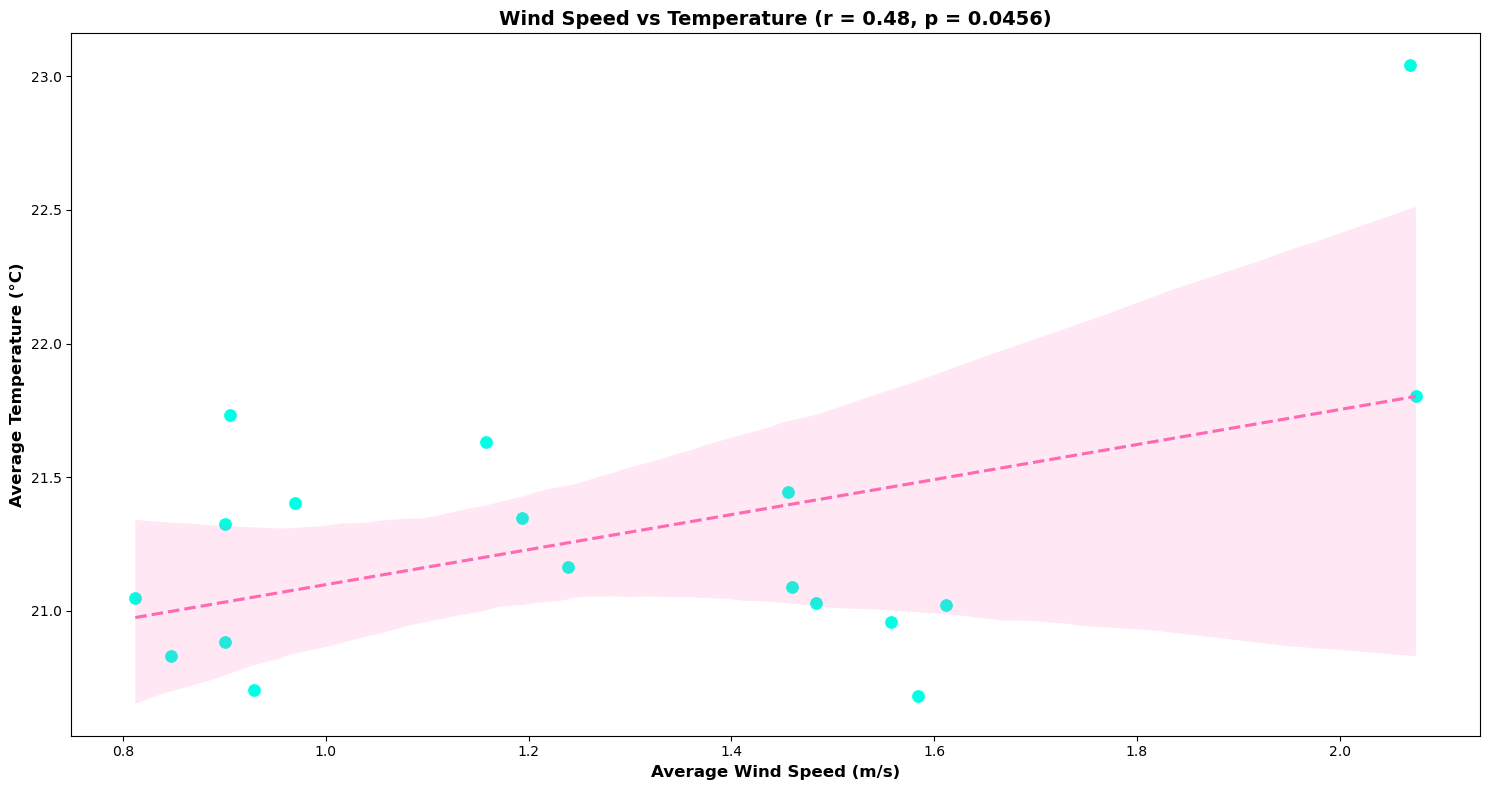

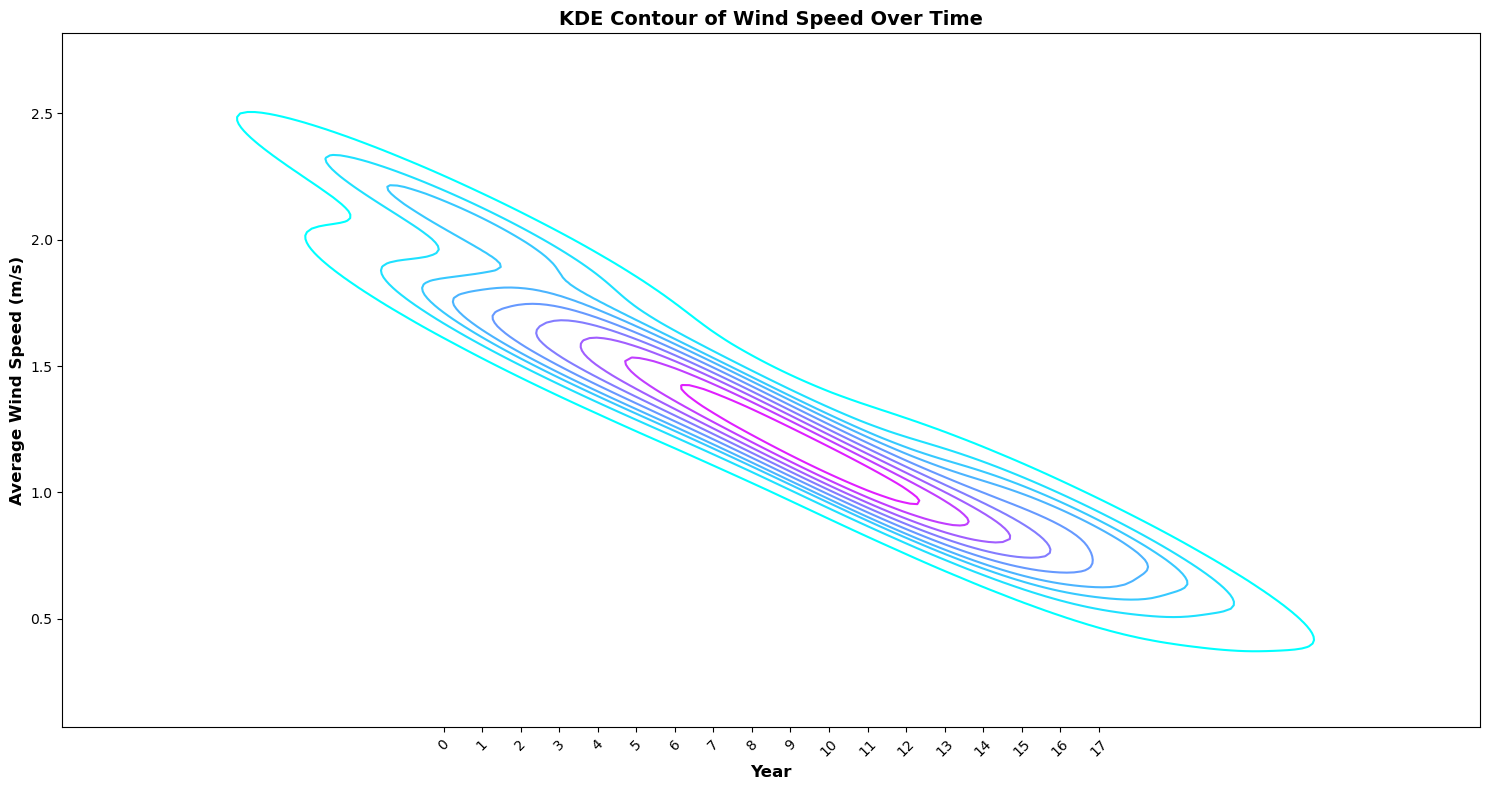

In [184]:

# TODO: relationship between average wind speed and average temperatur

# Bivariate Chart 1: Scatter + Regression Line (Wind vs Temp)  
plt.figure(figsize=(15, 8))
sns.scatterplot(x="wind_avg", y="temp_avg", data=weather, s=100, color=color_wind)
color_wind = "#00FFE5"
color_temp = "hotpink"

sns.regplot(x="wind_avg", y="temp_avg", data=weather, scatter=False, color=color_temp, line_kws={"linestyle": "--"})
r, p = pearsonr(weather["wind_avg"], weather["temp_avg"])
plt.title(f"Wind Speed vs Temperature (r = {r:.2f}, p = {p:.4f})", fontsize=14, fontweight='bold')
plt.xlabel("Average Wind Speed (m/s)", fontsize=12, fontweight='bold')
plt.ylabel("Average Temperature (°C)", fontsize=12, fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.show()

# Bivariate Chart 2: KDE Contour Plot - showing how average wind speed densities shifted over time from 2006 to 2023.

plt.figure(figsize=(15, 8))
sns.kdeplot(x=weather.index, y=weather["wind_avg"], cmap="cool", fill=False)
plt.title("KDE Contour of Wind Speed Over Time", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12, fontweight='bold')
plt.ylabel("Average Wind Speed (m/s)", fontsize=12, fontweight='bold')
plt.xticks(ticks=weather.index.astype(int), rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()


In [ ]:
# pivot taable aggregates the average wind speed and temperature by year
weather.pivot_table(
    values=["temp_avg", "wind_avg"],
    index="year",
    aggfunc="mean"
)

,temp_avg,wind_avg
year,,
2006,21.803087,2.075207
2007,23.040999,2.069605
2008,20.682400,1.584408
2009,21.023802,1.611746
2010,21.444293,1.455907
2011,20.959536,1.557709
2012,21.030624,1.483515
2013,21.088660,1.459356
2014,21.163462,1.238874


In [ ]:
# Calculate the correlation between Average Wind and Average Temperature.
temp_avg_wind_avg_corr = pearsonr(weather['wind_avg'], weather['temp_avg'])
print(f"Pearson's r: {temp_avg_wind_avg_corr[0]:.2f} and p-value: {temp_avg_wind_avg_corr[1]:.2e}") #Pearson correlation coefficient (r) and p-value between wind_avg and temp_avg

Pearson's r: 0.48 and p-value: 4.56e-02


In [ ]:
# Correlation Calculation generates a Pearson correlation matrix 
weather[["wind_avg", "temp_avg"]].corr()

,wind_avg,temp_avg
wind_avg,1.000000,0.476529
temp_avg,0.476529,1.000000


In [ ]:
# isolated Pearson correlation
weather["wind_avg"].corr(weather["temp_avg"]) #relationship between average wind speed and average temperature

np.float64(0.4765294973950928)

## 6. 🧠 Reflections

## How is average temperature changing across the years for Minas Gerais? Is this increasing or decreasing?

Univariate charts show that average temperature in Minas Gerais has remained relatively stable from 2006 to 2023, with only minor year-to-year fluctuations. The peak was in 2007 (23.04 °C) and the lowest in 2008 (20.68 °C), but overall, the trend does not show a consistent increase or decrease.

To validate this, we analyzed Z-scores, which standardize each year’s temperature relative to the dataset’s mean. The Z-scores for average temperature range mostly between –1 and +1, indicating that no year deviated drastically from the norm. For example:

2007 Z-score: +1.41 → Slightly warmer than average

2008 Z-score: –1.25 → Slightly cooler than average

These moderate Z-scores support the conclusion that temperature has not experienced a strong directional trend, but rather fluctuated around a long-term average.

## How is minimum humidity changing across the years for Minas Gerais? Is this increasing or decreasing?

Humidity fluctuates year to year, with notable lows around 2012, 2015, and 2021, but no strong long-term trend. The lowest recorded humidity was in 2014 (44.82%), and the highest in 2006 (57.81%). While univariate charts show generally stable values, there appears to be a moderate decline from 2006 to 2014, followed by some recovery. However, since the data only covers January to May, a fuller picture would require year-round data.


## How is average wind speed changing across the years for Minas Gerais? Is this increasing or decreasing?

Accodring to our bar chart, there a decreasing trend in wind speed over time. The Minas Gerais wind speed was highest in 2006–2007 and has consistently declined through 2023. Average wind speed is clearly decreasing over the years during the coffee beraing months of January through May and it is most apparent in our univariate scatter plot chart.

## Which year had the highest maximum record rainfall?

The year 2006 had the highest maximum rainfall, standing out as a clear outlier. While I expected more variation in average temperatures, they remained fairly consistent across years.

Despite anticipating a trend in maximum rainfall, the Pearson correlation (r ≈ 0.00) shows no linear relationship with time, indicating statistical stability from 2006 to 2023. The scatterplot with a flat red trendline and wide, consistent confidence band reinforces this, showing no directional change.

Maximum rainfall ranged from 1.6 mm to 6.5 mm, mostly clustering between 2.5 and 3.5 mm. The highest value is an isolated outlier, not part of a broader shift.

Overall, the data shows that extreme rainfall events occur, but their frequency and intensity have not changed significantly over time. This highlights how spikes do not equal trends, especially when the correlation is flat.

## What is the relationship between max rain and max humidity? How *strong* is this relationship? Use pearson's correlation coefficient.
The relationship between maximum rainfall and maximum humidity shows a moderate positive correlation (r = 0.41), meaning they tend to increase together. However, the p-value (0.0948) is above the 0.05 threshold, indicating the result is not statistically significant. Therefore, while a trend is present, we cannot confidently conclude that the correlation isn’t due to random chance.

## What is the relationship between average wind speed and average temperature? How *strong* is this relationship? Use pearson's correlation coefficient.

First, when looking at average wind speed over time (year vs wind_avg), the data shows a clear downward trend. From 2006 to 2023, wind speeds in Minas Gerais have gradually declined. This is confirmed by the Pearson correlation coefficient (r = –0.95), which reflects a strong negative correlation between year and wind speed. The nearly flat regression line and KDE contour plot reinforce this pattern, indicating a consistent drop in wind speed over time. This trend may suggest long-term environmental or climate changes affecting wind behavior.

Second, when analyzing the relationship between average wind speed and average temperature (wind_avg vs temp_avg), the data reveals a moderate positive correlation. The Pearson coefficient is r = 0.48 with a p-value of 0.0456, meaning the correlation is statistically significant. This indicates that within the years observed, higher wind speeds are generally associated with higher temperatures. The scatter plot with regression line confirms this upward relationship, showing that in years when the wind is stronger, the average temperature also tends to be higher.

In conclusion, these two relationships describe distinct but non-conflicting dynamics:

Wind speed is decreasing over time — a long-term trend with strong statistical support (r = –0.95).

Wind speed and temperature are positively correlated within the same time frame — a statistically significant relationship (r = 0.48, p = 0.0456).

These findings do not contradict each other. One relationship captures a temporal shift in wind behavior, while the other describes how wind and temperature interact during that same period. Together, they highlight wind’s evolving role as both a climate indicator and a contributing factor to annual temperature variation in Minas Gerais.

## Analysis in Summary

From 2006 to 2023 in Minas Gerais, the correlation heatmap revealed that average wind speed shows a moderate increasing trend over time, with a Pearson’s r of 0.56. This is the strongest time-based trend in the dataset and is clearly visible in the heatmap where Wind Avg and Year show a bright correlation cell.

Average temperature, by contrast, shows a weak decreasing trend (r = –0.20), and maximum humidity remains relatively unchanged (r = 0.13), both represented by lighter, near-zero cells in the heatmap. Similarly, maximum rainfall has not changed significantly over time (r = 0.09), suggesting variability without a directional shift.

However, using the raw data, the year with the highest recorded maximum rainfall was 2022, with 5.94 mm. The heatmap, in conjunction with Pearson’s coefficients, provides a comprehensive snapshot of which climate variables have shifted meaningfully and which have remained statistically stable over this 18-year period.

While small anomalies exist, average temperatures during the coffee-growing season (January to May) have been relatively consistent. The combination of line plots, Z-score bar charts, and no strong Pearson’s r trend confirms that temperature stability has been a defining feature of this period.
Z-score analysis supports this further: most years fall within ±1 standard deviation from the mean, indicating no extreme deviations. For example, 2007 was slightly warmer than average (Z ≈ +1.41), while 2008 was slightly cooler (Z ≈ –1.25), reinforcing the conclusion that temperatures have remained statistically stable.